In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import nltk # Natural Language Toolki
import re # Python Regular Expression 
from wordcloud import WordCloud 
sns.set_theme()
# Data visualization technique used for representing text data in which the size of each word indicates its frequency or importance


In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Input, Embedding, Bidirectional, GRU, GlobalAveragePooling1D, Dense, Dropout,LSTM,concatenate 
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

In [ ]:
somoytv = pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mehedi_somoyTV_Labeled.csv",prefix='col',header=None)
somoytv.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,https://www.somoynews.tv/news/2021-06-11/%E0%A...,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,শিক্ষা সময়,শিক্ষা,"১১ জুন, ২০২১",NaN,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,"ফলাফলে দেখা যায়, ইন্দ্রনীল মিশ্র অনার্স পরীক্ষ...",0,0
1,https://www.somoynews.tv/news/2021-06-11/%E0%A...,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,আন্তর্জাতিক ডেস্ক,আন্তর্জাতিক,"১১ জুন, ২০২১",NaN,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,এ নিয়ে অঞ্চলটিতে গণতন্ত্রপন্থী কর্মীদের সক্রিয়...,0,0
2,https://www.somoynews.tv/news/2021-06-11/%E0%A...,যে শাস্তি হতে পারে সাকিবের,খেলার সময়,খেলা,"১১ জুন, ২০২১",NaN,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,ঢাকা প্রিমিয়ার লিগে (ডিপিএল) শুক্রবার (১১ জুন)...,0,0
3,https://www.somoynews.tv/news/2021-06-11/%E0%A...,বিয়ে করেছেন রেলমন্ত্রী সুজন,নাজমুস সালেহীন,বাংলাদেশ,"১১ জুন, ২০২১",NaN,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,শাম্মী আকতার একটি বেসরকারি প্রতিষ্ঠানে প্রশাসন...,1,0
4,https://www.somoynews.tv/news/2021-06-12/%E0%A...,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,শিক্ষা সময়,বাংলাদেশ,"১২ জুন, ২০২১",NaN,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,করোনাভাইরাস মহামারির মধ্যে দেশের মাধ্যমিক ও উচ...,0,0


In [ ]:
somoytv1 = somoytv[['col1','col6','col7','col9']].rename(columns={'col1':'title',
                                                          'col6':'headline',
                                                          'col7':'content',
                                                          'col9':'label'})
somoytv1.head()

,title,headline,content,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,"ফলাফলে দেখা যায়, ইন্দ্রনীল মিশ্র অনার্স পরীক্ষ...",0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,এ নিয়ে অঞ্চলটিতে গণতন্ত্রপন্থী কর্মীদের সক্রিয়...,0
2,যে শাস্তি হতে পারে সাকিবের,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,ঢাকা প্রিমিয়ার লিগে (ডিপিএল) শুক্রবার (১১ জুন)...,0
3,বিয়ে করেছেন রেলমন্ত্রী সুজন,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,শাম্মী আকতার একটি বেসরকারি প্রতিষ্ঠানে প্রশাসন...,0
4,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,করোনাভাইরাস মহামারির মধ্যে দেশের মাধ্যমিক ও উচ...,0


In [ ]:
somoytv1['content'] = somoytv1['headline']+somoytv1['content']

In [ ]:
somoytv1.loc[0,'content']

"রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপাচার্য অধ্যাপক আবদুস সোবহান গত ৬ মে যে ১১ জন শিক্ষককে অবৈধভাবে নিয়োগ দিয়েছেন, তাদের অনেকেরই বিশ্ববিদ্যালয়ের শিক্ষক হওয়ার মতো ন্যূনতম যোগ্যতা নেই। সেই ১১ জন শিক্ষকের মধ্যে বিশ্ববিদ্যালয়টির প্রকৌশল অনুষদভুক্ত ইনফরমেশন অ্যান্ড কমিউনিকেশন ইঞ্জিনিয়ারিং বিভাগে নিয়োগ পেয়েছেন ইন্দ্রনীল মিশ্র। সম্প্রতি সেই প্রার্থীর অনার্স পরীক্ষার ফলাফল গণমাধ্যমের কাছে এসেছে।ফলাফলে দেখা যায়, ইন্দ্রনীল মিশ্র অনার্স পরীক্ষায় প্রথম শ্রেণি অর্জন করতে পারেননি। বরং দ্বিতীয় শ্রেণি পেয়ে যে ১৪ জন শিক্ষার্থী উত্তীর্ণ হয়েছে, তার মধ্যে ইন্দ্রনীল মিশ্র মেধাক্রম অনুযায়ী রয়েছেন দশম স্থানে। শুধু তাই নয়, তিনিই একমাত্র ছাত্র যিনি অনার্স এর কোর্স-৪০৩ এ ফেল করেছিলেন।এমন একজন ছাত্রকে বিভাগে শিক্ষক হিসেবে নিয়োগ দেওয়ায় বিস্ময় প্রকাশ করছেন স্বয়ং বিভাগের সভাপতি অধ্যাপক এমদাদুল হক। তিনি বলেন, বিভাগে নিয়োগের জন্য সার্কুলার দেওয়া হয়েছিল। কিন্তু সেই সার্কুলার ভিত্তিতে মৌখিক পরীক্ষা না নিয়েই একজন প্রার্থীকে শিক্ষক হিসেবে নিয়োগ দেওয়া হয়েছে। আবার এমন একজনকে নিয়োগ দেওয়া হলো যে কোনোভাবেই শিক্ষক পদে

In [ ]:
somoytv1.drop(labels='headline',axis=1,inplace=True)

In [ ]:
somoytv1.head()

,title,content,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,0
2,যে শাস্তি হতে পারে সাকিবের,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,0
3,বিয়ে করেছেন রেলমন্ত্রী সুজন,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,0
4,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,0


In [ ]:
somoytv1 = somoytv1[somoytv1.title!=0]

In [ ]:
import collections
collections.Counter(somoytv1['label'])

Counter({0: 415, 1: 21})

In [ ]:
somoytv1[somoytv1['label']==-1]=0

In [ ]:
collections.Counter(somoytv1['label'])

Counter({0: 415, 1: 21})

In [ ]:
somoytv1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
banfake = pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mahtab_BanFake_Labelled - Mahtab_BanFake_Labelled.csv",prefix='col',
                      skiprows=1,header=None)
banfake.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Satire,Clickbaits,NaN
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Satire,Satire,NaN
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,Reporter,Unrelated,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Satire,Satire,NaN
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,Reporter,Unrelated,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Satire,Clickbaits,NaN
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,Reporter,Unrelated,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Satire,Clickbaits,NaN


In [ ]:
banfake1 = banfake[['col6','col7','col10']].rename(columns={'col6':'title',
                                                   'col7':'content',
                                                   'col10':'label'})
banfake1.head()

,title,content,label
0,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",Clickbaits
1,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",Satire
2,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,Satire
3,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,Clickbaits
4,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",Clickbaits


In [ ]:
banfake1['label'].unique()

array(['Clickbaits', 'Satire', 'Fake'], dtype=object)

In [ ]:
banfake1['label']=banfake1['label'].map({'Clickbaits':1,"Satire":0,"Fake":0})

In [ ]:
import collections
collections.Counter(banfake1['label'])

Counter({0: 914, 1: 262})

In [ ]:
banfake1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
newcitizen=pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mahtab_Newcitizen_Labelled(Recheck) - Mahtab_Newcitizen_Labelled.csv").iloc[:,1:]
newcitizen.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,Label
0,https://newzcitizen.com/archives/28969,বাসাভাড়া নিতে বাড়িওয়ালাকে নকল স্বামী দেখালেন প...,NaN,NaN,"June 24, 2021",NaN,NaN,ঢাকায় একজন ব্যাচেলর মেয়ের সমস্যার শেষ নেই। বাস...,1,1,Clickbaits
1,https://newzcitizen.com/archives/28966,মাত্র ৫৫ টাকার বিনিয়োগে মিলবে ৩৬ হাজার! সরকারি...,NaN,NaN,"June 24, 2021",NaN,NaN,সকলেই ভবিষ্যতের জন্য বিনিয়োগ করতে চান। প্রয়োজন...,1,1,Clickbaits
2,https://newzcitizen.com/archives/28961,ভিক্ষুকের কোলের বাচ্চাটি সবসময় ঘুমিয়ে থাকার র’...,NaN,NaN,"June 24, 2021",NaN,NaN,চলার পথে বা জ্যামে গাড়িতে বসে থাকার সময় অনেক ধ...,1,1,Clickbaits
3,https://newzcitizen.com/archives/28958,নানা রহস্যে ভরপুর পরীমনির গাড়ি!,NaN,NaN,"June 24, 2021",NaN,NaN,রুপালি পর্দার আলোচিত এক অভিনেত্রী। চলচ্চিত্র ছ...,1,NaN,Clickbaits
4,https://newzcitizen.com/archives/28953,"যেভাবে একদিনে তৈরি হয় ১০ তলা বিলাসবহুল বাড়ি, দ...",NaN,NaN,"June 24, 2021",NaN,NaN,চীনের সামগ্রীর এত জনপ্রিয়তা কেন?? এর প্রথম কা...,1,NaN,Clickbaits


In [ ]:
newcitizen1 = newcitizen[['col_1','col_7','Label']].rename(columns={'col_1':'title',
                                                   'col_7':'content',
                                                   'Label':'label'})
newcitizen1.head()

,title,content,label
0,বাসাভাড়া নিতে বাড়িওয়ালাকে নকল স্বামী দেখালেন প...,ঢাকায় একজন ব্যাচেলর মেয়ের সমস্যার শেষ নেই। বাস...,Clickbaits
1,মাত্র ৫৫ টাকার বিনিয়োগে মিলবে ৩৬ হাজার! সরকারি...,সকলেই ভবিষ্যতের জন্য বিনিয়োগ করতে চান। প্রয়োজন...,Clickbaits
2,ভিক্ষুকের কোলের বাচ্চাটি সবসময় ঘুমিয়ে থাকার র’...,চলার পথে বা জ্যামে গাড়িতে বসে থাকার সময় অনেক ধ...,Clickbaits
3,নানা রহস্যে ভরপুর পরীমনির গাড়ি!,রুপালি পর্দার আলোচিত এক অভিনেত্রী। চলচ্চিত্র ছ...,Clickbaits
4,"যেভাবে একদিনে তৈরি হয় ১০ তলা বিলাসবহুল বাড়ি, দ...",চীনের সামগ্রীর এত জনপ্রিয়তা কেন?? এর প্রথম কা...,Clickbaits


In [ ]:
newcitizen1['label'].unique()

array(['Clickbaits', nan], dtype=object)

In [ ]:
collections.Counter(newcitizen1['label'])

Counter({'Clickbaits': 308, nan: 677})

In [ ]:
newcitizen1['label'] = newcitizen1['label'].map({'Clickbaits':1}).fillna(0).astype('int')

In [ ]:
collections.Counter(newcitizen1['label'])

Counter({0: 677, 1: 308})

In [ ]:
newcitizen1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
rtv=pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/Mahtab_rtv_labelled - Mahtab_rtv_labelled.csv").iloc[:,1:]
rtv.head()

,col_0,title,col_2,col_3,col_4,col_5,col_6,content,col_8,label
0,https://www.rtvonline.com/bangladesh/134786/%E...,নাসিরসহ আসামিরা আদালতে,আরটিভি নিউজ,বাংলাদেশ,১৫ জুন ২০২১,নাসিরসহ আসামিরা আদালতে,নায়িকা পরীমণির মামলায় নাসিরসহ আসামিদের আদালতে ...,নায়িকা পরীমণির মামলায় নাসিরসহ আসামিদের আদালতে ...,2,NaN
1,https://www.rtvonline.com/bangladesh/134785/%E...,পরীমণির মামলার তদন্ত প্রতিবেদন ৮ জুলাইয়ের মধ্যে,আরটিভি নিউজ,বাংলাদেশ,১৫ জুন ২০২১,পরীমণির মামলার তদন্ত প্রতিবেদন ৮ জুলাইয়ের মধ্যে,চিত্রনায়িকা পরীমণিকে হত্যা ও ধর্ষণচেষ্টার অভিয...,চিত্রনায়িকা পরীমণিকে হত্যা ও ধর্ষণচেষ্টার অভি...,2,NaN
2,https://www.rtvonline.com/country/134784/%E0%A...,ব্যাংকের টাকা লুট করতে সুড়ঙ্গ তৈরি,আরটিভি নিউজ,দেশজুড়ে,১৫ জুন ২০২১,"ব্যাংকের, টাকা, লুট, করতে, সুড়ঙ্গ, তৈরি, rtv o...",রংপুরের মিঠাপুকুর উপজেলার লতিবপুর ইউপির জায়গীর...,রংপুরের মিঠাপুকুর উপজেলার লতিবপুর ইউপির জায়গী...,2,NaN
3,https://www.rtvonline.com/international/134783...,দেউলিয়া হতে চায় যুক্তরাষ্ট্রের সবচেয়ে বড় শপিং ...,"আন্তর্জাতিক ডেস্ক, আরটিভি নিউজ",আন্তর্জাতিক,১৫ জুন ২০২১,দেউলিয়া হতে চায় যুক্তরাষ্ট্রের সবচেয়ে বড় শপিং ...,মহামারি করোনার ধাক্কায় বিশ্বজুড়েই সৃষ্টি হয়েছে...,মহামারি করোনার ধাক্কায় বিশ্বজুড়েই সৃষ্টি হয়েছ...,2,NaN
4,https://www.rtvonline.com/country/134782/%E0%A...,ইয়াবাসহ গ্রেপ্তার দুধ জসিম,"চট্টগ্রাম প্রতিনিধি, আরটিভি নিউজ",দেশজুড়ে,১৫ জুন ২০২১,"ইয়াবাসহ, গ্রেপ্তার, দুধ, জসিম",চট্টগ্রামে ইয়াবাসহ এক মাদক বিক্রেতাকে গ্রেপ্তা...,চট্টগ্রামে ইয়াবাসহ এক মাদক বিক্রেতাকে গ্রেপ্ত...,2,NaN


In [ ]:
rtv1 = rtv[['title','content','label']]
rtv1.head()

,title,content,label
0,নাসিরসহ আসামিরা আদালতে,নায়িকা পরীমণির মামলায় নাসিরসহ আসামিদের আদালতে ...,NaN
1,পরীমণির মামলার তদন্ত প্রতিবেদন ৮ জুলাইয়ের মধ্যে,চিত্রনায়িকা পরীমণিকে হত্যা ও ধর্ষণচেষ্টার অভি...,NaN
2,ব্যাংকের টাকা লুট করতে সুড়ঙ্গ তৈরি,রংপুরের মিঠাপুকুর উপজেলার লতিবপুর ইউপির জায়গী...,NaN
3,দেউলিয়া হতে চায় যুক্তরাষ্ট্রের সবচেয়ে বড় শপিং ...,মহামারি করোনার ধাক্কায় বিশ্বজুড়েই সৃষ্টি হয়েছ...,NaN
4,ইয়াবাসহ গ্রেপ্তার দুধ জসিম,চট্টগ্রামে ইয়াবাসহ এক মাদক বিক্রেতাকে গ্রেপ্ত...,NaN


In [ ]:
collections.Counter(rtv1['label'])

Counter({'-1': 5, 'Clickbaits': 84, nan: 1000})

In [ ]:
rtv1['label'] = rtv1['label'].map({'-1':0,'Clickbaits':1}).fillna(0).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
collections.Counter(rtv1['label'])

Counter({0: 1005, 1: 84})

In [ ]:
rtv1.dtypes

title      object
content    object
label       int64
dtype: object

In [ ]:
topdhaka = pd.read_csv('/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Labelled/topdhaka_final - topdhaka_final.csv').iloc[:,1:]
topdhaka.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,Clickabait
0,https://topdhaka.com/%e0%a6%aa%e0%a7%81%e0%a6%...,পু’রুষের শ’ক্তি বা’ড়ানোর ৪টি ঔ’ষধি খা’বার।,NaN,NaN,2021-07-19,NaN,NaN,বর্তমান যুগে বেশিরভাগ পুরুষই যৌ’ন সমস্যায় ভোগ...,1,1.0
1,https://topdhaka.com/%e0%a6%ac%e0%a6%bf%e0%a6%...,বি’বাহিত না’রীরা যে ৫ টি কারণে প’রকীয়া করে,NaN,NaN,2021-07-19,NaN,NaN,প’রকীয়া যেন আমাদের দৈনন্দিন জীবনের সাথে চলে আ...,1,1.0
2,https://topdhaka.com/%e0%a6%aa%e0%a7%8d%e0%a6%...,প্রবাসীরা দেশে আসলেই বাসায় ডাকতেন নায়িকা রোমানা,NaN,NaN,2021-07-19,NaN,NaN,সৌদি আরব প্রবাসী কামরুল ই’সলাম জুয়েলের দা’য়ের ...,1,NaN
3,https://topdhaka.com/%e0%a6%aa%e0%a7%8d%e0%a6%...,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল’নের আমাকে ...,NaN,NaN,2021-07-18,NaN,NaN,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল;নের আমাকে ...,1,1.0
4,https://topdhaka.com/%e0%a6%9f%e0%a6%be%e0%a6%...,"টানা ২ ঘন্টা ক’রে দেখিয়েছি, আমিও পারি : সালমা",NaN,NaN,2021-07-19,NaN,NaN,সম্প্রতি লালমাটিয়ায় সংগীত পরিচালক রেজওয়ান শেখে...,1,1.0


In [ ]:
topdhaka1 = topdhaka[['col_1','col_7','Clickabait']].rename(columns=
                                                         {'col_1':'title','col_7':'content','Clickabait':'label'})

In [ ]:
topdhaka1.head()

,title,content,label
0,পু’রুষের শ’ক্তি বা’ড়ানোর ৪টি ঔ’ষধি খা’বার।,বর্তমান যুগে বেশিরভাগ পুরুষই যৌ’ন সমস্যায় ভোগ...,1.0
1,বি’বাহিত না’রীরা যে ৫ টি কারণে প’রকীয়া করে,প’রকীয়া যেন আমাদের দৈনন্দিন জীবনের সাথে চলে আ...,1.0
2,প্রবাসীরা দেশে আসলেই বাসায় ডাকতেন নায়িকা রোমানা,সৌদি আরব প্রবাসী কামরুল ই’সলাম জুয়েলের দা’য়ের ...,NaN
3,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল’নের আমাকে ...,প্রশ্নঃ- আমার স্বা’মী শা’রীরিক মি’ল;নের আমাকে ...,1.0
4,"টানা ২ ঘন্টা ক’রে দেখিয়েছি, আমিও পারি : সালমা",সম্প্রতি লালমাটিয়ায় সংগীত পরিচালক রেজওয়ান শেখে...,1.0


In [ ]:
topdhaka1[topdhaka1['label']==1].iloc[-1,:]

title       যে ১০ পেশার পুরুষের প্রতি নারীদের দু’র্বলতা বেশি
content    নারীদের প্রতি পুরুষের যেমন আক’র্ষণ রয়েছে তেমনি...
label                                                      1
Name: 699, dtype: object

In [ ]:
topdhaka1=topdhaka1.iloc[:700,:]

In [ ]:
topdhaka1.shape

(700, 3)

In [ ]:
collections.Counter(topdhaka1['label'])

In [ ]:
topdhaka1.label= topdhaka1.label.apply(lambda x:0 if x==-1 else x).fillna(0).astype('int')

In [ ]:
import collections
collections.Counter(topdhaka1['label'])

Counter({0: 388, 1: 312})

In [ ]:
banfake_authentic = pd.read_csv("/content/drive/MyDrive/Thesis BRAC/Thesis Dataset/Authentic-48K.csv/Authentic-48K.csv")
banfake_authentic.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [ ]:
banfake_authentic1 = banfake_authentic[['headline','content','label']].rename(columns={'headline':'title'})
banfake_authentic1.label = 0

In [ ]:
all_combined = pd.concat([somoytv1,banfake1,newcitizen1,rtv1,topdhaka1,banfake_authentic1[len(banfake_authentic1.title)//2:]])
all_combined = all_combined[all_combined.title!=0]

In [ ]:
all_combined.describe(include='all')

,title,content,label
count,28725,28725.0,28725.000000
unique,27277,28697.0,NaN
top,সিরাজগঞ্জে যুবলীগ নেতাকে কুপিয়ে হত্যা,0.0,NaN
freq,15,2.0,NaN
mean,NaN,NaN,0.034360
std,NaN,NaN,0.182156
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,0.000000


In [ ]:
all_combined.head()

,title,content,label
0,শিক্ষকতার ন্যূনতম যোগ্যতা নেই রাবিতে নিয়োগ পাও...,রাজশাহী বিশ্ববিদ্যালয়ের (রাবি) সদ্য বিদায়ী উপা...,0
1,ভারতে দলে দলে ঢুকছে মিয়ানমারের যোদ্ধারা,মিয়ানমারে সেনা অভ্যুত্থানের ফলে হাজার হাজার মা...,0
2,যে শাস্তি হতে পারে সাকিবের,সাকিবের এমন অস্বাভাবিক আচরণের ঘটনাটি খতিয়ে দেখ...,0
3,বিয়ে করেছেন রেলমন্ত্রী সুজন,গত ৫ জুন বিয়ে করেছেন রেলমন্ত্রী নুরুল ইসলাম সু...,0
4,আরও বাড়ল শিক্ষাপ্রতিষ্ঠানের ছুটি,দেশের বিভিন্ন অঞ্চলে করোনা পরিস্থিতি অবনতি হওয...,0


In [ ]:
collections.Counter(all_combined['label'])

Counter({0: 27738, 1: 987})

# t-test

In [ ]:
all_combined = pd.concat([somoytv1,banfake1,newcitizen1,rtv1,topdhaka1,banfake_authentic1])
all_combined = all_combined[all_combined.title!=0]

In [ ]:
all_combined.shape

(28723, 3)

In [ ]:
# data preprocessing
puncList = ["।", "”", "“", "'"]
x = "".join(puncList)
filterString = x + '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n০১২৩৪৫৬৭৮৯0123456789'

In [ ]:
from scipy.stats import ttest_ind_from_stats
def calculate_t_test(c_t,non_c_t):
  df_num = (c_t.values.var()/c_t.shape[0] + non_c_t.values.var()/non_c_t.shape[0])**2
  df_dem = (
      (c_t.values.var()/c_t.shape[0])**2/(c_t.shape[0]-1)) + \
      (non_c_t.values.var()/non_c_t.shape[0])**2/(non_c_t.shape[0]-1)
  df = df_num/df_dem
  # print('degrees of freedom: {}'.format(df))
  
  t_score = ttest_ind_from_stats(mean2=non_c_t.values.mean(), std2=np.sqrt(non_c_t.values.var()), nobs2=non_c_t.values.shape[0], \
                               mean1=c_t.values.mean(), std1=np.sqrt(c_t.values.var()), nobs1=c_t.values.shape[0], \
                               equal_var=False)
  return df,t_score

In [ ]:
filtered = all_combined.title.apply(lambda x:re.sub("["+filterString+"]","",x))
filtered=filtered.apply(lambda x:len(x))
non_c_t1 =filtered[all_combined.label==0].sample(2000,random_state = 321)
c_t1 = filtered[all_combined.label==1]

In [ ]:
print(calculate_t_test(c_t1,non_c_t1))

(1479.0205824018137, Ttest_indResult(statistic=16.094004514857314, pvalue=7.944223670477821e-54))


In [ ]:
filtered = all_combined.title.apply(lambda x:re.sub("["+filterString+"]","",x))
filtered=filtered.apply(lambda x:len(x.split()))
non_c_t2 =filtered[all_combined.label==0].sample(2000,random_state = 321)
c_t2 = filtered[all_combined.label==1]

In [ ]:
print(calculate_t_test(c_t2,non_c_t2))

(1331.5499543113976, Ttest_indResult(statistic=26.107813045812662, pvalue=1.1287855033963126e-121))


In [ ]:
!pip install bnlp-toolkit

     |████████████████████████████████| 23.9 MB 92 kB/s 
     |████████████████████████████████| 1.2 MB 31.8 MB/s 
     |████████████████████████████████| 743 kB 48.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp.corpus import punctuations
punctuations+='০১২৩৪৫৬৭৮৯0123456789'
filtered_punc = all_combined.title.copy()
for i,values in enumerate(all_combined.title):
  punc = [x for x in values if x in punctuations]
  filtered_punc.iloc[i]=len(punc)
filtered_punc

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


0        0
1        0
2        0
3        0
4        0
        ..
48673    1
48674    2
48675    2
48676    0
48677    1
Name: title, Length: 53062, dtype: object

In [ ]:
non_c_t3 =filtered_punc[all_combined.label==0].sample(2000,random_state=321)
c_t3 = filtered_punc[all_combined.label==1]

In [ ]:
print(calculate_t_test(c_t3,non_c_t3))

(2869.285767660492, Ttest_indResult(statistic=3.5368552108594877, pvalue=0.0004113364095319062))


In [ ]:
c_t = [c_t1.values,c_t2.values,c_t3.values]
non_c_t=[non_c_t1.values,non_c_t2.values,non_c_t3.values]

In [ ]:
len(c_t)

3

In [ ]:
def plot_kd(c_t,non_c_t,ft='title'):
  fig,axes=plt.subplots(1,3,figsize=(10*3,10))
  for i in range(len(axes)):
    sns.kdeplot(x=non_c_t[i],ax=axes[i],label='Non clickbait',fill=True, palette="crest")
    sns.kdeplot(x=c_t[i],ax=axes[i],label='Clickbait',fill=True, palette="crest")
    # plt.xticks(fontsize=16)
    # plt.yticks(fontsize=16)
    # labels = list(axes[i].get_xticklabels())
    # print(labels)
    # axes[i].set_xticklabels(labels,fontsize=16)
    axes[i].legend()
  axes[0].set_xticks(list(range(0,176,25)))
  axes[0].set_xticklabels(list(range(0,176,25)),fontsize=16)
  axes[1].set_xticks(list(range(0,31,5)))
  axes[1].set_xticklabels(list(range(0,31,5)),fontsize=16)
  axes[2].set_xticks(list(range(0,21,5)))
  axes[2].set_xticklabels(list(range(0,21,5)),fontsize=16)
  axes[0].set_yticks(np.arange(0,.03,.005))
  axes[0].set_yticklabels(np.arange(0,.03,.005),fontsize=16)
  axes[1].set_yticks(np.arange(0.05,.25,.05))
  axes[1].set_yticklabels(list(map(lambda x:f'{x:.3f}',np.arange(0,.25,.05))),fontsize=16)
  axes[2].set_yticks(np.arange(0,.35,.05))
  axes[2].set_yticklabels(list(map(lambda x:f'{x:.3f}',np.arange(0,.35,.05))),fontsize=16)
  axes[0].set_title(ft+' number of characters',fontsize=20)
  axes[1].set_title(ft+ ' number of words',fontsize=20)
  axes[2].set_title(ft+' punctuation and digit frequency',fontsize=20)
  axes[0].set_ylabel('Density',fontsize=16)
  axes[1].set_ylabel('')
  axes[2].set_ylabel('')
  fig.savefig('kde_'+ft+'.png')

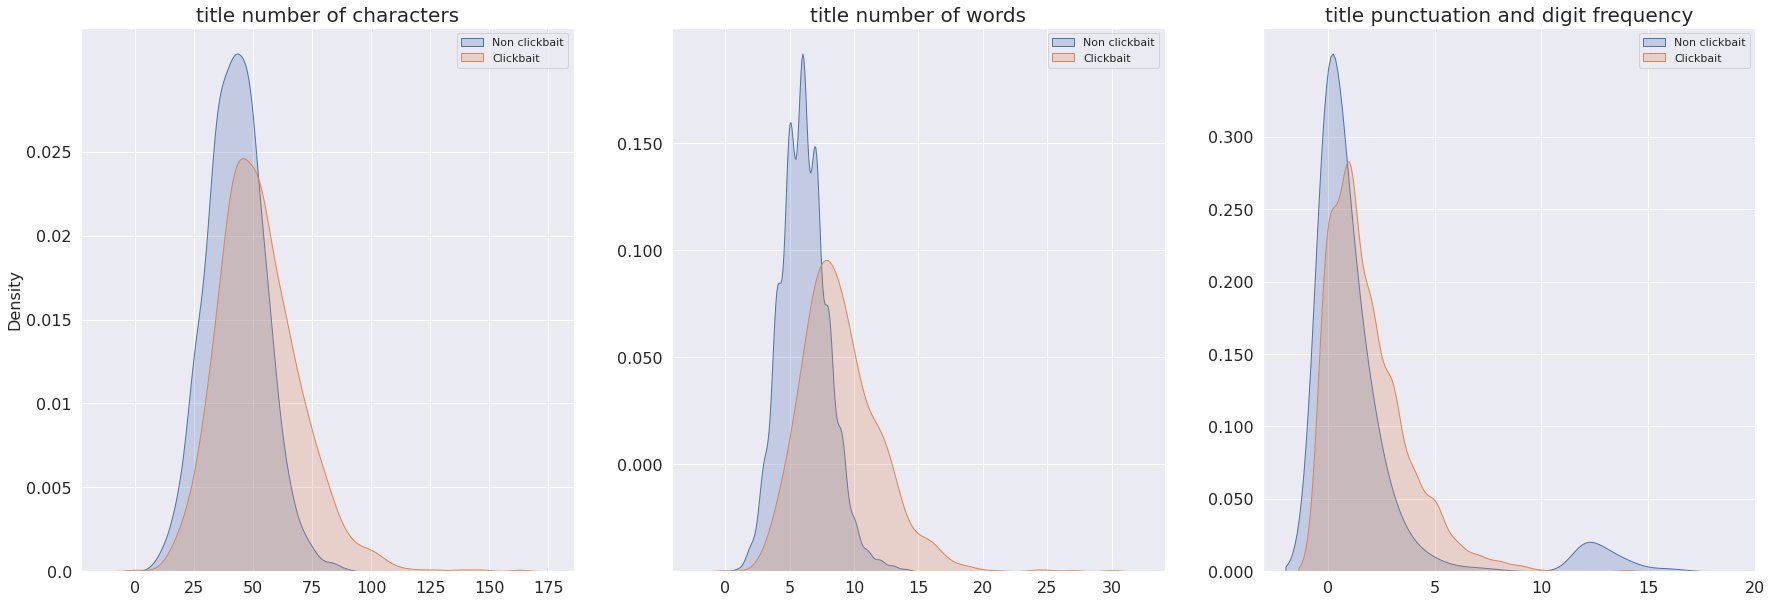

In [ ]:
plot_kd(c_t,non_c_t)

Manually finidng ttest score

In [ ]:
s_welch = np.sqrt(c_t.values.var()/c_t.shape[0] + non_c_t.values.var()/non_c_t.shape[0])
t=(c_t.values.mean()-non_c_t.values.mean())/s_welch
print('t-value: {}'.format(t))

t-value: 16.094004514857314


In [ ]:
filteredc = all_combined.content.apply(lambda x:re.sub("["+filterString+"]","",x))
filteredc=filteredc.apply(lambda x:len(x))
non_c_c1 =filteredc[all_combined.label==0].sample(2000,random_state = 321)
c_c1 = filteredc[all_combined.label==1]

In [ ]:
calculate_t_test(non_c_c1,c_c1)

(2241.3869115849157,
 Ttest_indResult(statistic=-3.705643354252619, pvalue=0.00021596164315434898))

In [ ]:
filteredc = all_combined.content.apply(lambda x:re.sub("["+filterString+"]","",x))
filteredc=filteredc.apply(lambda x:len(x.split()))
non_c_c2 =filteredc[all_combined.label==0].sample(2000,random_state = 321)
c_c2 = filteredc[all_combined.label==1]

In [ ]:
non_c_c2

22074    133
39222    264
26854    102
10429    205
29739     77
        ... 
32173    272
12068    329
33586    141
32580    380
6499     249
Name: content, Length: 2000, dtype: int64

In [ ]:
calculate_t_test(non_c_c2,c_c2)

(2172.75354522883,
 Ttest_indResult(statistic=-4.923122055734319, pvalue=9.158368229849913e-07))

In [ ]:
from bnlp.corpus import punctuations
punctuations+='০১২৩৪৫৬৭৮৯0123456789'
filtered_punc = all_combined.content.copy()
for i,values in enumerate(all_combined.content):
  punc = [x for x in values if x in punctuations]
  filtered_punc.iloc[i]=len(punc)
filtered_punc

0        79
1        34
2        54
3        65
4        43
         ..
48673    83
48674    54
48675    27
48676    39
48677    56
Name: content, Length: 53062, dtype: object

In [ ]:
non_c_c3 =filtered_punc[all_combined.label==0].sample(2000,random_state=321)
c_c3 = filtered_punc[all_combined.label==1]

In [ ]:
calculate_t_test(non_c_c3,c_c3)

(2097.394666222737,
 Ttest_indResult(statistic=-3.120366048475039, pvalue=0.001830846950072574))

In [ ]:
c_c = [c_c1.values,c_c2.values,c_c3.values]
non_c_c=[non_c_c1.values,non_c_c2.values,non_c_c3.values]

In [ ]:
def plot_kd_content(c_t,non_c_t,ft='title'):
  fig,axes=plt.subplots(1,3,figsize=(10*3,10))
  for i in range(len(axes)):
    sns.kdeplot(x=non_c_t[i],ax=axes[i],label='Non clickbait',fill=True, palette="crest")
    sns.kdeplot(x=c_t[i],ax=axes[i],label='Clickbait',fill=True, palette="crest")
    axes[i].legend()
  axes[0].set_xticks(np.arange(0,20000,5000))
  axes[0].set_xticklabels(np.arange(0,20001,5000),fontsize=16)
  axes[1].set_xticks(np.arange(0,3501,500))
  axes[1].set_xticklabels(np.arange(0,3501,500),fontsize=16)
  axes[2].set_xticks(np.arange(0,601,100))
  axes[2].set_xticklabels(np.arange(0,601,100),fontsize=16)
  axes[0].set_yticks(np.arange(0,.0006,.0001))
  axes[0].set_yticklabels(list(map(lambda x:f'{x:.4f}',np.arange(0,.0006,.0001))),fontsize=16)
  axes[1].set_yticks(np.arange(0,.004,.0005))
  axes[1].set_yticklabels(list(map(lambda x:f'{x:.4f}',np.arange(0,.0031,.0005))),fontsize=16)
  axes[2].set_yticks(np.arange(0,.015,.002))
  axes[2].set_yticklabels(list(map(lambda x:f'{x:.3f}',np.arange(0,.015,.002))),fontsize=16)
  axes[0].set_title(ft+' number of characters',fontsize=20)
  axes[1].set_title(ft+ ' number of words',fontsize=20)
  axes[2].set_title(ft+' punctuation and digit frequency',fontsize=20)
  axes[0].set_ylabel('Density',fontsize=16)
  axes[1].set_ylabel('')
  axes[2].set_ylabel('')
  fig.savefig('kde_'+ft+'.png')

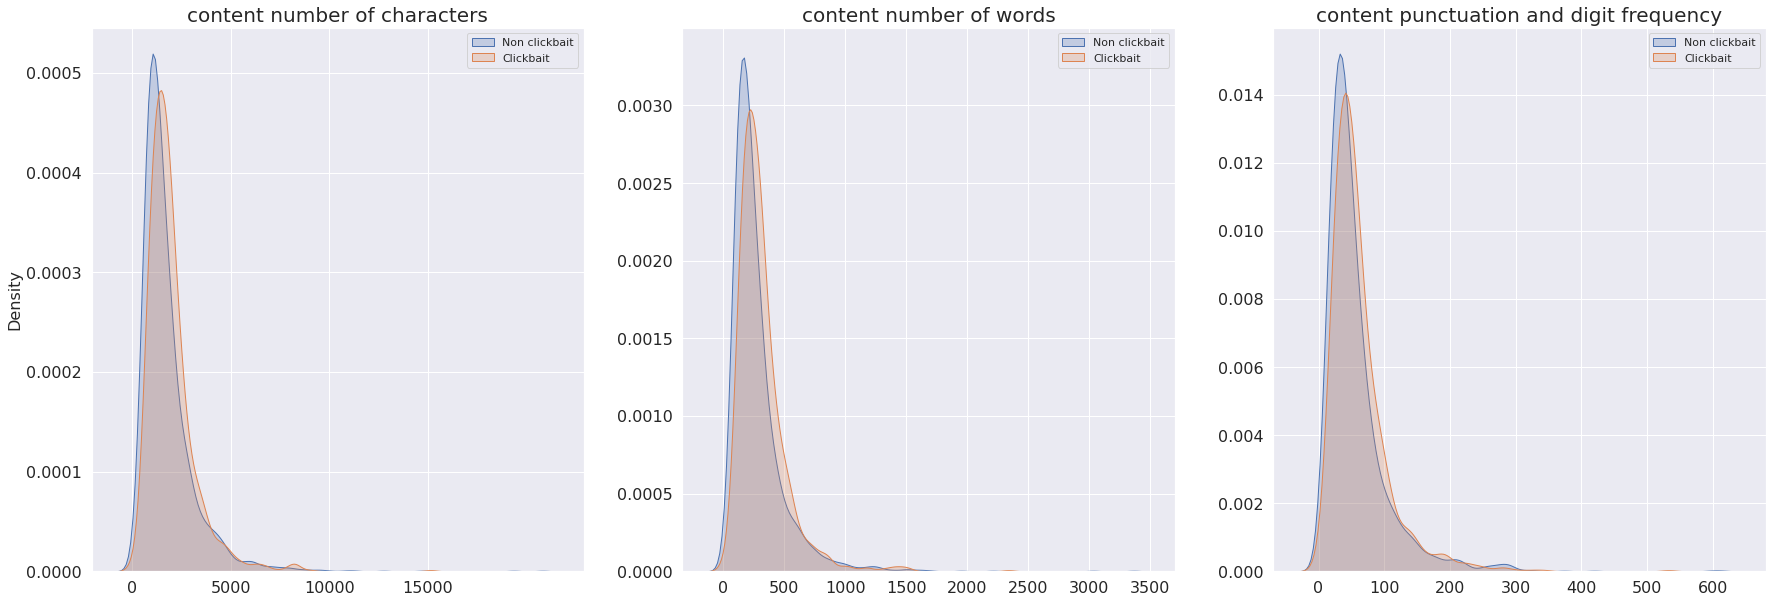

In [ ]:
plot_kd_content(c_c,non_c_c,ft='content')

#Title-content similarity

In [ ]:
X = pd.concat([somoytv1,banfake1,newcitizen1,rtv1,topdhaka1,banfake_authentic1])
X = X[X.title!=0]
clickbait = X[X.label==1]
non_click = X[X.label==0]
labels=X.label.values

In [ ]:
ntxtrain,ntxtest,ntytrain,ntytest=train_test_split(non_click['title'].apply(lambda x:re.sub("["+filterString+"]","",x)),non_click['label'].values,
                                               stratify = non_click['label'].values,test_size=0.2,shuffle=True)
txtrain,txtest,tytrain,tytest=train_test_split(clickbait['title'].apply(lambda x:re.sub("["+filterString+"]","",x)),clickbait['label'].values,
                                               stratify = clickbait['label'].values,test_size=0.1,shuffle=True)
ncxtrain,ncxtest,ncytrain,ncytest=train_test_split(non_click['content'].apply(lambda x:re.sub("["+filterString+"]","",x)),non_click['label'].values,
                                               stratify = non_click['label'].values,test_size=0.2,shuffle=True)
cxtrain,cxtest,cytrain,cytest=train_test_split(clickbait['content'].apply(lambda x:re.sub("["+filterString+"]","",x)),clickbait['label'].values,
                                               stratify = clickbait['label'].values,test_size=0.1,shuffle=True)

In [ ]:
txtrain.head()

36098    শনিবার দুপুর টা পর্যন্ত শাহবাগ মোড় উন্মুক্ত থাকবে
22769              সর্বদলীয় নয় নির্দলীয় সরকার চায় বিএনপি
43327    ফেনীতে ইয়াবাসহ  মাদক ব্যবসায়ী আটক ॥ প্রাইভেট ক...
2444                ঘরের মাঠে সিটির হার জয়ে শুরু বায়ার্নের
11237           দেশের বাজারে এলো মোটোরোলার নতুন স্মার্টফোন
Name: title, dtype: object

In [ ]:
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

In [ ]:
def read_corpus(df,labels,tokens_only=False):
  for i,values in enumerate(df):
    tokens = basic_tokenizer.tokenize(values)
    if tokens_only:
      yield tokens
    else:
      yield TaggedDocument(tokens, [labels[i]])
    

ttrain_corpus=list(read_corpus(txtrain,tytrain))
ttest_corpus=list(read_corpus(txtest,tytest,tokens_only=True))
nttrain_corpus=list(read_corpus(ntxtrain,ntytrain))
nttest_corpus=list(read_corpus(ntxtest,ntytest,tokens_only=True))

ctrain_corpus=list(read_corpus(cxtrain,cytrain))
ctest_corpus=list(read_corpus(cxtest,cytest,tokens_only=True))
nctrain_corpus=list(read_corpus(ncxtrain,ncytrain))
nctest_corpus=list(read_corpus(ncxtest,ncytest,tokens_only=True))

In [ ]:
tmodel = Doc2Vec(vector_size=100, min_count=2, workers=8,
                 epochs=40)
tmodel.build_vocab(ttrain_corpus)
tmodel.train(ttrain_corpus, total_examples=tmodel.corpus_count, epochs=tmodel.epochs)

In [ ]:
ntmodel = Doc2Vec(vector_size=100, min_count=2, workers=8,
                 epochs=40)
ntmodel.build_vocab(nttrain_corpus)
ntmodel.train(nttrain_corpus, total_examples=ntmodel.corpus_count, epochs=ntmodel.epochs)

In [ ]:
cmodel = Doc2Vec(vector_size=100, min_count=2, workers=8,
                 epochs=40)
cmodel.build_vocab(ctrain_corpus)
cmodel.train(ctrain_corpus, total_examples=cmodel.corpus_count, epochs=cmodel.epochs)

In [ ]:
ncmodel = Doc2Vec(vector_size=100, min_count=2, workers=8,
                 epochs=40)
ncmodel.build_vocab(nctrain_corpus)
ncmodel.train(nctrain_corpus, total_examples=ncmodel.corpus_count, epochs=ncmodel.epochs)

In [ ]:
j=0
for w,tag in nctrain_corpus:
  print(w)
  j+=1
  if j>2:
    break

['নারায়ণগঞ্জ', 'আসনের', 'এমপি', 'সেলিম', 'ওসমান', 'বলেছেন', 'ভাবী', 'আমার', 'মায়ের', 'মতো', 'আজমেরী', 'আমার', 'জান', 'অতি', 'দরদী', 'সাবধান', 'সে', 'যেই', 'হোক', 'না', 'কেন', 'যারা', 'ওসমান', 'পরিবারকে', 'খাটো', 'করার', 'চেষ্টা', 'করবে', 'তাদেরকে', 'বাংলাদেশে', 'রাজনীতি', 'করতে', 'দেয়া', 'হবে', 'না', 'বৃহস্পতিবার', 'সন্ধ্যায়', 'ঢাকানারায়ণগঞ্জ', 'লিংক', 'রোডের', 'ফতুল্লায়', 'নাসিম', 'ওসমান', 'মেমোরিয়াল', 'অ্যামিউজম্যান্ট', 'পার্কে', 'এক', 'মতোবিনিময়', 'সভায়', 'প্রধান', 'অতিথির', 'বক্তব্যে', 'তিনি', 'এসব', 'কথা', 'বলেন', 'এ', 'সময়', 'তিনি', 'বলেন', 'আমরা', 'জানি', 'কারা', 'খেলছে', 'ওসমান', 'পরিবারকে', 'ধ্বংস', 'করতে', 'দেয়া', 'হবে', 'না', 'আমরা', 'দুই', 'ভাই', 'সেলিম', 'ওসমান', 'ও', 'শামীম', 'ওসমান', 'মাঠে', 'নামব', 'দেখবো', 'তখন', 'কে', 'কত', 'খেলতে', 'পারেন', 'তিনি', 'বলেন', 'কেউ', 'কেউ', 'পেছন', 'থেকে', 'কলকাঠি', 'নাড়ছেন', 'এসব', 'বন্ধ', 'করেন', 'আপনারা', 'এখনও', 'সেলিম', 'ওসমানকে', 'দেখেন', 'নাই', 'অনেক', 'মাফ', 'করেছি', 'আর', 'মাফ', 'করবো', 'না', 'আমি', 'ওসমান', 'পরিবারের', 'সবচেয়ে'

In [ ]:
c_cos_sim= []
for i,(w,tag) in enumerate(ttrain_corpus):
  c_cos_sim.append(1-cosine(tmodel.infer_vector(w),cmodel.infer_vector(ctrain_corpus[i][0])))
  # print(i,w)
  # print(ctrain_corpus[i][0])
  # if i>2:
  #   break

In [ ]:
ttest_corpus[:2]

[['জীবন', 'বদলে', 'দেয়া', 'আবুল', 'হায়াতের', 'টি', 'উক্তি'],
 ['মাত্র',
  'দশ',
  'মিনিটে',
  'ক্যান্সার',
  'শনাক্ত',
  'এবার',
  'হার্ভার্ডে',
  'ডাক',
  'পেলেন',
  'সেই',
  'শিক্ষার্থী']]

In [ ]:
for i,w in enumerate(ttest_corpus):
  c_cos_sim.append(1-cosine(tmodel.infer_vector(w),cmodel.infer_vector(ctest_corpus[i])))

In [ ]:
non_c_cos_sim= []
for i,(w,tag) in enumerate(nttrain_corpus):
  non_c_cos_sim.append(1-cosine(ntmodel.infer_vector(w),ncmodel.infer_vector(nctrain_corpus[i][0])))
for i,w in enumerate(nttest_corpus):
  non_c_cos_sim.append(1-cosine(ntmodel.infer_vector(w),ncmodel.infer_vector(nctest_corpus[i]))) 

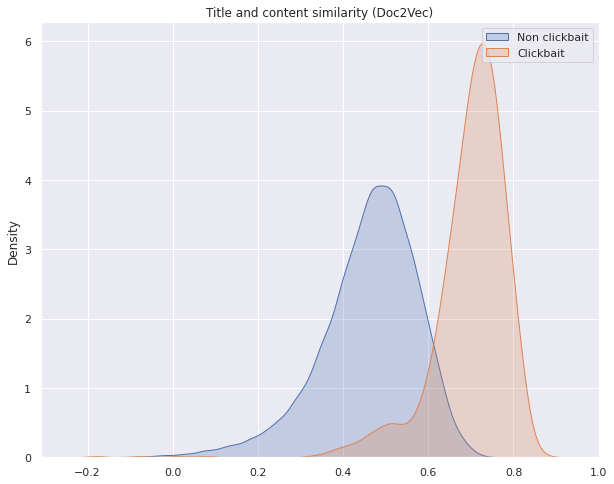

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.kdeplot(x=non_c_cos_sim,ax=axes,label='Non clickbait',fill=True,palette='crest')
sns.kdeplot(x=c_cos_sim,ax=axes,label='Clickbait',fill=True, palette="crest")
plt.title('Title and content similarity (Doc2Vec)')
axes.legend()
fig.savefig('kde_content_title_similarity_doc2vec.png')

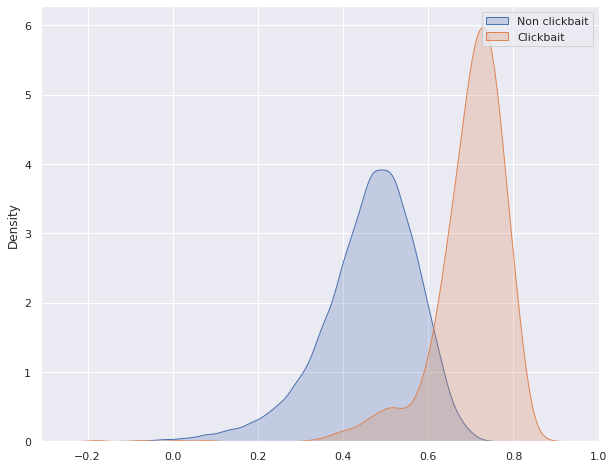

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.kdeplot(x=non_c_cos_sim,ax=axes,label='Non clickbait',fill=True,palette='crest')
sns.kdeplot(x=c_cos_sim[:],ax=axes,label='Clickbait',fill=True, palette="crest")
axes.legend()
fig.savefig('kde_content_title_similarity_doc2vec2.png')

In [ ]:
def word_emb(X,word_embed=wv_bangla):
    print('I am in word_emb')
    vocab=word_embed.index_to_key
    # print("Vocab Size =>%s" %(len(vocab)))
    df = X.copy()
        
    for i,values in enumerate(df):
      v =[word_embed[x] for x in values.split() if x in vocab]
      df.iloc[i]=v
    df= df.apply(lambda x:np.mean(x,axis=0) if len(x)!=0 else [0]*word_embed.vector_size)
    # tokentovaluelist = [vector[token] for token in tokens if token in vocab]
    return df.values

In [ ]:
sampled = all_combined[all_combined.label==0].sample(2000,random_state=321)
wv_title_non_c = word_emb(sampled.title,wv_bangla)
wv_content_non_c = word_emb(sampled.content,wv_bangla)
wv_title_c = word_emb(all_combined[all_combined.label==1].title,wv_bangla)
wv_content_c = word_emb(all_combined[all_combined.label==1].content,wv_bangla)

I am in word_emb
I am in word_emb
I am in word_emb
I am in word_emb


In [ ]:
from scipy.spatial.distance import cosine

In [ ]:
non_c_cos_sim= []
for j,val in enumerate(wv_title_non_c):
  non_c_cos_sim.append(1-cosine(val,wv_content_non_c[j]))

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
c_cos_sim= []
for j,val in enumerate(wv_title_c):
  c_cos_sim.append(1-cosine(val,wv_content_c[j]))

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


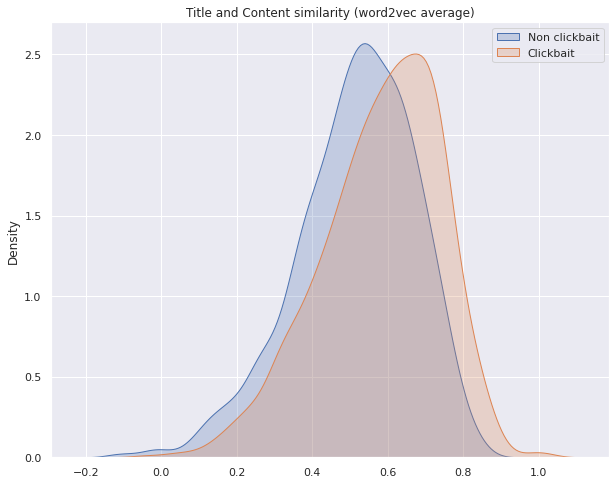

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.kdeplot(x=non_c_cos_sim,ax=axes,label='Non clickbait',fill=True,palette='crest')
sns.kdeplot(x=c_cos_sim,ax=axes,label='Clickbait',fill=True, palette="crest")
plt.title('Title and Content similarity (word2vec average)')
axes.legend()
fig.savefig('kde_content_title_similarity.png')

In [ ]:
from bnlp import BasicTokenizer
basic_tokenizer = BasicTokenizer()

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# word-embedding (pre-trained)

## word2vec

In [ ]:
from gensim.models import KeyedVectors
wv_bangla = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/machine_learning/bnwiki_word2vec.vector")

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
wv_bangla.index_to_key[:5]

['।', ',', 'এবং', 'ও', 'হয়']

## fasttext

In [ ]:
from gensim.models.fasttext import load_facebook_model
ft_bangla =load_facebook_model("/content/drive/MyDrive/machine_learning/bengali_fasttext_wiki.bin",
                                              encoding='utf-8')

In [ ]:
ft_wordvec = ft_bangla.wv
del ft_bangla

In [ ]:
ft_wordvec.index_to_key

## Glove

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
glove_file = '/content/drive/MyDrive/machine_learning/bn_glove.39M.300d.txt'
tmp_file = get_tmpfile('/content/drive/MyDrive/machine_learning/bn_glove_w2vec.39M.300d.txt')
_ = glove2word2vec(glove_file, tmp_file)
gv_bangla = KeyedVectors.load_word2vec_format(tmp_file)

## self trained we

In [ ]:
from gensim.models import Word2Vec
def train_word_emb(tokens):
  num_features = 300
  min_word_count = 3
  num_workers = 2
  window_size = 6
  subsampling = 1e-3
  model = Word2Vec(
          tokens,
          workers=num_workers,
          vector_size=num_features,
          min_count=min_word_count,
          window=window_size,
          sample=subsampling)
  
  word_embed= model.wv
  del model
  return word_embed

In [ ]:
st_wv = train_word_emb(banfake_authentic1[:len(banfake_authentic1.title)//2]\
                       .title.apply(lambda x: basic_tokenizer.tokenize(str(x))).values)

In [ ]:
train_data = banfake_authentic1[:len(banfake_authentic1.title)//2].title.apply(lambda x:re.sub("["+filterString+"]","",x))
train_data = train_data.apply(lambda x:x.split())
st_wv = train_word_emb(train_data.values)

# visulaize word embedding

In [ ]:
import io
def save_word_embed(word2vec1,model_name):
  out_v = io.open(model_name+'word2vec1.tsv', 'w', encoding='utf-8')
  out_m = io.open(model_name+'title_vocab.tsv', 'w', encoding='utf-8')
  for index, word in enumerate(word2vec1.index_to_key):
    # if index == 0:
    #   continue  # skip 0, it's padding.
    vec = word2vec1[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
  out_v.close()
  out_m.close()

In [ ]:
save_word_embed(wv_bangla,'word2vec_bangla')

In [ ]:
save_word_embed(ft_wordvec,'fasttext_bangla')

In [ ]:
save_word_embed(gv_bangla,'glove_bangla')

In [ ]:
save_word_embed(st_wv,'self_trained_bangla')

In [ ]:
len(wv_bangla.vectors)

160404

In [ ]:
common_vectors = [w for w in wv_bangla.index_to_key[:1000] 
                  if w in ft_wordvec.index_to_key and w in gv_bangla.index_to_key and w in st_wv.index_to_key]

In [ ]:
common_vectors

['এবং',
 'ও',
 'হয়',
 'করে',
 'তিনি',
 'একটি',
 'এই',
 'করেন',
 'তার',
 'থেকে',
 'করা',
 'সালে',
 'এর',
 'জন্য',
 'ছিল',
 'মধ্যে',
 'সাথে',
 'সালের',
 'বা',
 'হিসেবে',
 'যে',
 'ছিলেন',
 'যায়',
 'এ',
 'প্রথম',
 'হয়ে',
 'যা',
 'করতে',
 'তাদের',
 'না',
 'হন',
 'করার',
 'পর',
 'নিয়ে',
 'এক',
 'করেছিলেন',
 'একজন',
 'শুরু',
 'বছর',
 'সময়',
 'থাকে',
 'হল',
 'পর্যন্ত',
 'তাকে',
 'বিভিন্ন',
 'করেছেন',
 'তারা',
 'জন',
 'তবে',
 'হিসাবে',
 'কিছু',
 'পারে',
 'কিন্তু',
 'দিয়ে',
 'ভারতের',
 'অংশ',
 'কাজ',
 'পরে',
 'নাম',
 'বলে',
 'ব্যবহার',
 'নামে',
 'হতে',
 'মাধ্যমে',
 'দলের',
 'প্রধান',
 'জাতীয়',
 'জেলার',
 'লাভ',
 'অনেক',
 'কোন',
 'যার',
 'বেশি',
 'আছে',
 'উপর',
 'দিকে',
 'তাঁর',
 'দেখা',
 'হার',
 'ফলে',
 'দক্ষিণ',
 'কারণে',
 'সদস্য',
 'তৈরি',
 'চলচ্চিত্র',
 'আর',
 'তা',
 'বাংলাদেশের',
 'ক্রিকেট',
 'ভারতীয়',
 'নতুন',
 'টি',
 'দেন',
 'আন্তর্জাতিক',
 'দল',
 'হবে',
 'দুই',
 'সঙ্গে',
 'বিপক্ষে',
 'কাছে',
 'সাল',
 'প্রতি',
 'বাংলাদেশ',
 'অন্যতম',
 'শেষ',
 'সেই',
 'উত্তর',
 'যেখানে',
 'সে',
 'বল

In [ ]:
'ইসলাম' in common_vectors

True

# NN models

Data Preprocessing, splitting, making embedding matrix

In [ ]:
X = all_combined["title"].values
Y = all_combined["label"].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=109,stratify=Y,shuffle=True)

In [ ]:
# data preprocessing
puncList = ["।", "”", "“", "'"]
x = "".join(puncList)
filterString = x + '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n০১২৩৪৫৬৭৮৯0123456789'

In [ ]:
total_vocab = len(set([w for word in all_combined.title.apply(lambda x:re.sub("["+filterString+"]","",x)) for w in word.split()]))
total_vocab

27725

In [ ]:
import collections
filtered=all_combined.title.apply(lambda x:re.sub("["+filterString+"]","",x))
filtered= filtered.apply(lambda x:len(x.split()))
frequency = collections.Counter(filtered)

In [ ]:
frequency

In [ ]:
filteredc=all_combined.content.apply(lambda x:re.sub("["+filterString+"]","",x))
filteredc= filteredc.apply(lambda x:len(x.split()))
frequencyc = collections.Counter(filteredc)

In [ ]:
frequencyc.keys()

dict_keys([346, 163, 315, 229, 219, 206, 170, 212, 283, 256, 282, 341, 460, 334, 307, 183, 410, 121, 222, 161, 213, 528, 238, 278, 118, 221, 64, 136, 190, 367, 399, 306, 348, 251, 244, 247, 207, 173, 158, 351, 331, 269, 157, 166, 201, 115, 119, 421, 233, 356, 240, 179, 164, 205, 159, 266, 153, 248, 224, 231, 359, 122, 169, 171, 415, 177, 131, 293, 332, 291, 223, 120, 145, 180, 193, 133, 167, 178, 200, 388, 135, 184, 232, 155, 361, 134, 236, 48, 102, 343, 299, 352, 109, 253, 149, 128, 277, 275, 148, 194, 112, 124, 100, 239, 301, 347, 402, 354, 312, 204, 265, 451, 316, 339, 285, 393, 172, 216, 214, 185, 114, 259, 130, 104, 260, 452, 267, 76, 276, 94, 372, 116, 249, 294, 364, 187, 419, 146, 138, 174, 140, 311, 252, 258, 319, 220, 176, 250, 97, 237, 262, 795, 349, 137, 373, 154, 181, 142, 428, 84, 268, 209, 324, 186, 86, 156, 303, 564, 208, 215, 273, 127, 379, 289, 340, 242, 139, 2011, 325, 507, 192, 95, 310, 780, 257, 168, 317, 125, 477, 188, 330, 160, 235, 191, 304, 409, 391, 405, 431, 3

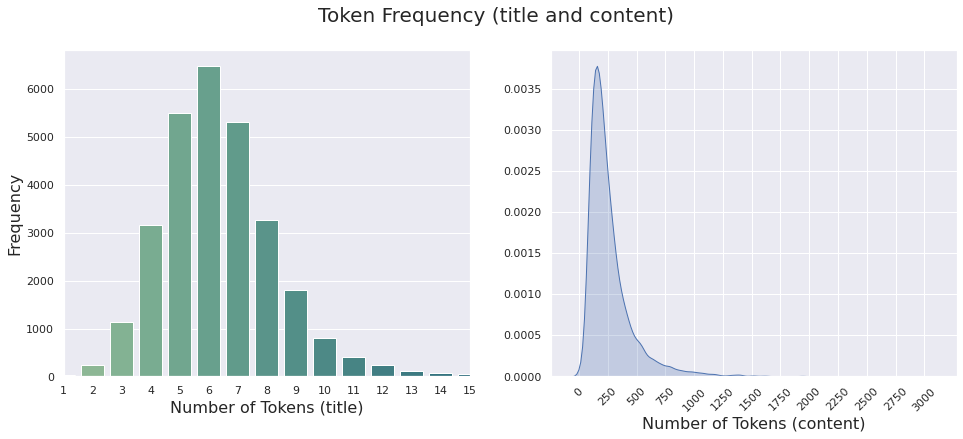

In [ ]:
%matplotlib inline
fig,axes=plt.subplots(1,2,figsize=(8*2,6))
sns.barplot(x=list(frequency.keys()),y=list(frequency.values()),palette="crest",ax=axes[0])
sns.kdeplot(x=filteredc.values,palette="crest",fill=True,ax=axes[1])
# plt.xlim(0, 20)
# in this notbook color is not working but it should work.
axes[0].set_xlabel('Number of Tokens (title)',fontsize=16)
axes[1].set_xlabel('Number of Tokens (content)',fontsize=16)
axes[0].set_ylabel('Frequency',fontsize=16)
axes[1].set_ylabel('')
axes[0].set_xlim(1,15)
axes[1].set_xticks(np.arange(0,3001,250))
axes[1].set_xticklabels(np.arange(0,3001,250),rotation=45)
plt.suptitle('Token Frequency (title and content)',fontsize=20)
fig.savefig('Token_Frequency_KDE.PNG')
# plt.show()  
# print(f"Maximum Length of a title: {max(frequency.keys())}")
# print(f"Minimum Length of a title: {min(frequency.keys())}")
# print(f"Average Length of a title: {round(np.mean(list(frequency.keys())),0)}")

In [ ]:
tokenizer = Tokenizer(num_words=25000, filters=filterString, lower=False,)
tokenizer.fit_on_texts(x_train)
train_idx = tokenizer.texts_to_sequences(x_train)
test_idx = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index

In [ ]:
j=0
for w,index in word_index.items():
  print(w,index)
  j=j+1
  if j>10:
    break

In [ ]:
tokenizer.texts_to_sequences('ব্যাংকের টাকা লুট করতে সুড়ঙ্গ তৈরি'.split())

[[314], [19], [4114], [20], [22836], [346]]

In [ ]:
len(word_index)

24606

In [ ]:
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH=10

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
      embedding_vector = wv_bangla.get_vector(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    except:
      pass

In [ ]:
embedding_matrix[314]

array([ 0.34510231, -0.96300751, -2.07753253, -0.1356325 , -3.252527  ,
       -0.51136059, -3.2541635 , -0.45027396, -4.48984051,  0.51681066,
       -3.24594569,  1.38475299, -0.13589099,  1.82171094,  1.32903886,
       -0.28000474,  1.32091653,  0.23341559,  0.8936491 ,  2.01517701,
       -0.31244591,  0.17478646,  1.46298397,  3.06319046, -4.73892307,
        0.73920137, -1.04970753,  0.19463861, -2.68930459,  1.95569408,
        1.94110477,  2.5673914 , -0.08585348,  0.79070491,  0.08338036,
        1.39597344, -1.08060288,  1.66488063, -0.2165774 ,  2.12364864,
        1.25099421,  1.8424108 ,  5.23569918,  0.02177313,  0.14167443,
        3.36250353, -2.28694558, -2.94384384,  1.62469316,  2.56480169,
       -3.33378696, -0.64416331,  0.94647592, -1.46582365,  0.04034437,
        0.52816105, -1.99822068, -0.36655414,  2.05909157, -0.89703673,
       -1.44551945,  1.43860328,  1.92165506,  2.0869801 , -0.21816961,
        1.40367258,  0.03368167,  1.23277855,  0.5707348 , -3.93

In [ ]:
x_train = pad_sequences(train_idx, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
x_test = pad_sequences(test_idx, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

## CNN (kim 2014 - CNN-static)

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dense,Dropout,concatenate

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedded_sequences = embedding_layer(sequence_input)
conv_1 = Conv1D(256, 1, activation='relu')(embedded_sequences)
mpool_1 = MaxPool1D(conv_1.get_shape()[1],strides=1,padding='valid')(conv_1)
conv_2 = Conv1D(256, 2, activation='relu')(embedded_sequences)
mpool_2 = MaxPool1D(conv_2.get_shape()[1],strides=1,padding='valid')(conv_2)
conv_3 = Conv1D(256, 3, activation='relu')(embedded_sequences)
mpool_3 = MaxPool1D(conv_3.get_shape()[1],strides=1,padding='valid')(conv_3)
conv_4 = Conv1D(256, 4, activation='relu')(embedded_sequences)
mpool_4 = MaxPool1D(conv_4.get_shape()[1],strides=1,padding='valid')(conv_4)
conv_concat = concatenate([mpool_1,mpool_2,mpool_3,mpool_4])

x = Flatten()(conv_concat)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(sequence_input, preds)
# print(conv_1.get_shape())
# mpool_1.get_shape()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 17, 100)      2460700     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 17, 256)      25856       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 16, 256)      51456       embedding[0][0]                  
______________________________________________________________________________________________

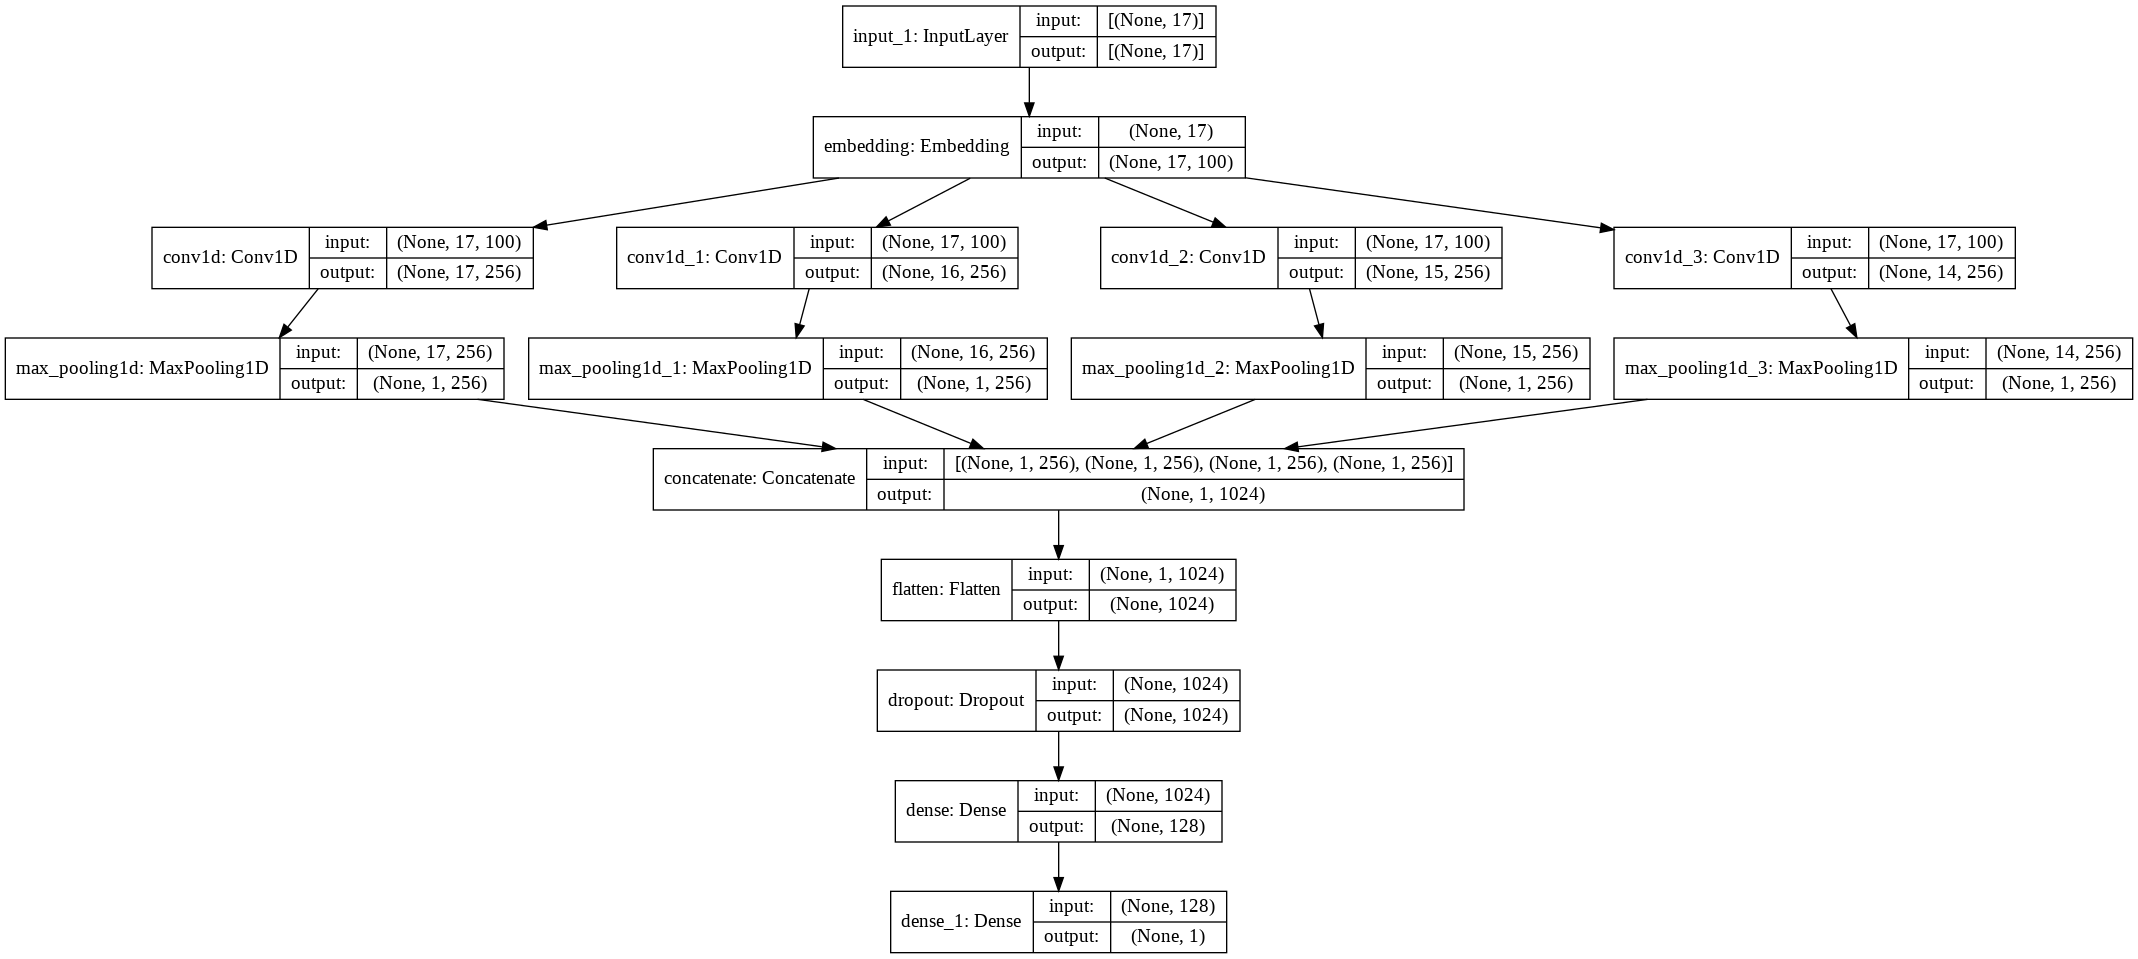

In [ ]:
#plotting model
plot_model(model, show_shapes=True, to_file = 'cnn_w2vec_notrain.png')

In [ ]:
def model_compilation_fit(model):
  model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=2e-5),
              metrics='accuracy')

  checkpoints = ModelCheckpoint('cnn_w2vec_notrain_weight.hdf5', 
                               monitor='val_loss', 
                               mode='max', 
                               verbose=True, 
                               save_best_only=True)

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                                factor=0.1, 
                                patience=2, 
                                verbose=1, 
                                min_lr=0.000001)


  early_stop = EarlyStopping(monitor='val_loss', patience=3)
  history = model.fit(x_train,y_train,batch_size=512,
                      validation_data=(x_test,y_test),
                      epochs=20,
                      workers=8,verbose = 1,
            callbacks=[checkpoints, reduce_lr, early_stop]) 
  return history,model


In [ ]:
history,model=model_compilation_fit(model)

Epoch 1/20
45/45 [==============================] - 36s 82ms/step - loss: 0.2308 - accuracy: 0.9475 - val_loss: 0.1740 - val_accuracy: 0.9650

Epoch 00001: val_loss improved from -inf to 0.17402, saving model to cnn_w2vec_notrain_weight.hdf5
Epoch 2/20
45/45 [==============================] - 3s 65ms/step - loss: 0.1809 - accuracy: 0.9641 - val_loss: 0.1556 - val_accuracy: 0.9643

Epoch 00002: val_loss did not improve from 0.17402
Epoch 3/20
45/45 [==============================] - 3s 65ms/step - loss: 0.1660 - accuracy: 0.9631 - val_loss: 0.1444 - val_accuracy: 0.9638

Epoch 00003: val_loss did not improve from 0.17402
Epoch 4/20
45/45 [==============================] - 3s 65ms/step - loss: 0.1560 - accuracy: 0.9637 - val_loss: 0.1377 - val_accuracy: 0.9645

Epoch 00004: val_loss did not improve from 0.17402
Epoch 5/20
45/45 [==============================] - 3s 65ms/step - loss: 0.1477 - accuracy: 0.9636 - val_loss: 0.1318 - val_accuracy: 0.9641

Epoch 00005: val_loss did not improve

(<keras.callbacks.History at 0x7efc62040910>,
 <keras.engine.functional.Functional at 0x7efc623d5390>)

## LSTM (Zhou et al., 2016)

In [ ]:
class attention(Layer):
    def __init__(self,units):
        super(attention,self).__init__()
        self.W = Dense(units)
    
    def call(self,u):
        score = tf.nn.tanh(self.W(u))
        attention_weights = tf.nn.softmax(score,axis=1)
        context_vector=attention_weights*u
        context_vector=tf.reduce_sum(context_vector,axis=1)

        # et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        # at=K.softmax(et)
        # at=K.expand_dims(at,axis=-1)
        # output=x*at
        return context_vector,attention_weights

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
from keras.layers import Embedding,LSTM

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
sequence_input=Input((MAX_SEQUENCE_LENGTH,))
embedded_sequences = embedding_layer(sequence_input)
lstm1=Bidirectional(LSTM(256,return_sequences=True))(embedded_sequences)
dp=Dropout(0.5)(lstm1)
lstm2=Bidirectional(LSTM(256,return_sequences=True))(dp)
ct,att_weight=attention(units=512)(lstm2)
outputs=Dense(1,activation='sigmoid',trainable=True)(ct)
model=Model(sequence_input,outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 17, 100)           2460700   
_________________________________________________________________
bidirectional (Bidirectional (None, 17, 512)           731136    
_________________________________________________________________
dropout (Dropout)            (None, 17, 512)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 17, 512)           1574912   
_________________________________________________________________
attention (attention)        ((None, 512), (None, 17,  262656    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513   

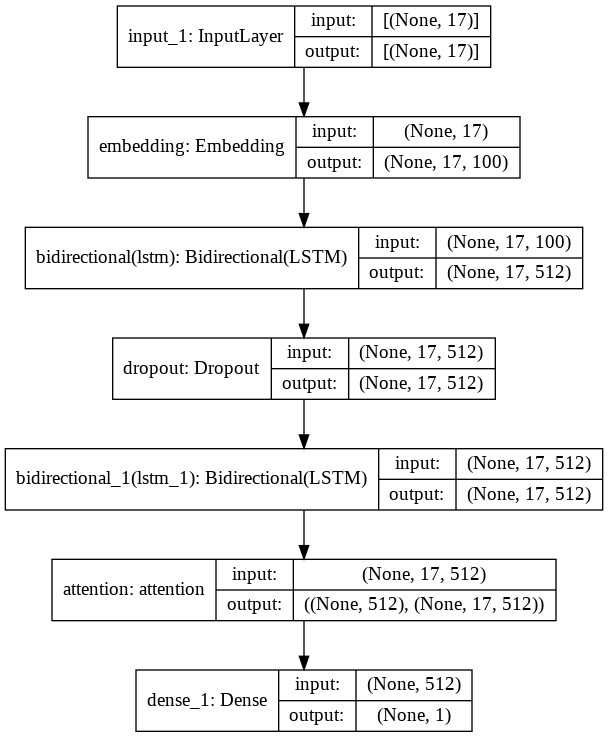

In [ ]:
#plotting model
plot_model(model, show_shapes=True, to_file = 'lstm_w2vec_notrain.png')

In [ ]:
history,model=model_compilation_fit(model)

Epoch 1/20
45/45 [==============================] - 12s 119ms/step - loss: 0.5938 - accuracy: 0.9014 - val_loss: 0.4964 - val_accuracy: 0.9641

Epoch 00001: val_loss improved from -inf to 0.49638, saving model to cnn_w2vec_notrain_weight.hdf5
Epoch 2/20
45/45 [==============================] - 3s 77ms/step - loss: 0.4096 - accuracy: 0.9644 - val_loss: 0.3163 - val_accuracy: 0.9654

Epoch 00002: val_loss did not improve from 0.49638
Epoch 3/20
45/45 [==============================] - 3s 76ms/step - loss: 0.2584 - accuracy: 0.9654 - val_loss: 0.2129 - val_accuracy: 0.9657

Epoch 00003: val_loss did not improve from 0.49638
Epoch 4/20
45/45 [==============================] - 3s 76ms/step - loss: 0.1921 - accuracy: 0.9654 - val_loss: 0.1762 - val_accuracy: 0.9657

Epoch 00004: val_loss did not improve from 0.49638
Epoch 5/20
45/45 [==============================] - 3s 77ms/step - loss: 0.1630 - accuracy: 0.9654 - val_loss: 0.1528 - val_accuracy: 0.9657

Epoch 00005: val_loss did not improv

# Visualizing attention weights

In [ ]:
model.save_weights('lstm_w2vec_notrain.h5')

In [ ]:
model.load_weights('lstm_w2vec_notrain.h5')

In [ ]:
attention_layer = model.get_layer(index=5)
len(attention_layer.output)

2

In [ ]:
filtered=all_combined[all_combined.label==1].title.apply(lambda x:re.sub("["+filterString+"]","",x))
filtered= filtered[filtered.apply(lambda x:len(x.split()))==10]

In [ ]:
filtered.head(10)

97     নুসরাতের কপালে সিঁদুর এ যেন মানতেই পারছেন না ত...
140         X লেখারও যে এতো কৌশল আছে সেটা আপনি জানতেন কি
160    রিয়াল মাদ্রিদ নয় অবশেষে মোহামেডানে যোগ দিচ্ছেন...
311    সুন্দরী মহিলারাও কি হস্তমৈথুন উপভোগ করে জানুন...
313    কোচিং যদি আর্থিক লেনদেনের পরিবর্তে বিভিন্ন ব্র...
340      বদির হাতে এখন শুধু দুটি অপশন সময় মাত্র পাঁচ দিন
393    যে টি কারণ দেখিয়ে বন্ধুরা শেষ মুহূর্তে ট্যুর ক...
415    আপনার বয় ফ্রেন্ড আছে কিনা  জবাবে যা বললেন জান্...
470    ঢাকার সেলিব্রেটি গ্যালারিতে মৃণাল হক যে ভাস্কর...
501    জাহাঙ্গীরনগরে আসার আগে অতিথি পাখিদের যে টি প্র...
Name: title, dtype: object

In [ ]:
st = filtered.iloc[7]
st

'আপনার বয় ফ্রেন্ড আছে কিনা  জবাবে যা বললেন জান্নাতুল ঐশী'

In [ ]:
x = tokenizer.texts_to_sequences([st])
x=pad_sequences(x,maxlen=10,padding='post',truncating='post')[0]
x

array([  513,  7861, 11782,   242,  1899,  2693,    56,    91,  2713,
         844], dtype=int32)

In [ ]:
x.shape

(10,)

In [ ]:
import keras.backend as K
outputs = []
for layer in model.layers:
    keras_function = K.function([model.input], [layer.output])
    outputs.append(keras_function([np.expand_dims(x,axis=0)]))
# print(outputs)

In [ ]:
len(outputs)

7

In [ ]:
model.predict(np.expand_dims(x_train[0],axis=0))

array([[0.7732589]], dtype=float32)

In [ ]:
outputs[-1]

[array([[0.7732589]], dtype=float32)]

In [ ]:
attention_weights = outputs[-2][0][0][1][0]
attention_weights = np.mean(attention_weights,axis=1)
attention_weights

array([0.09862138, 0.09888832, 0.09932205, 0.09976858, 0.10008621,
       0.10041162, 0.10090569, 0.10111798, 0.10079145, 0.10008669],
      dtype=float32)

In [ ]:
words =st.split()
words

['আপনার',
 'বয়',
 'ফ্রেন্ড',
 'আছে',
 'কিনা',
 'জবাবে',
 'যা',
 'বললেন',
 'জান্নাতুল',
 'ঐশী']

In [ ]:
from google.colab import files
files = files.upload()

Saving kalpurush.ttf to kalpurush.ttf


In [ ]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


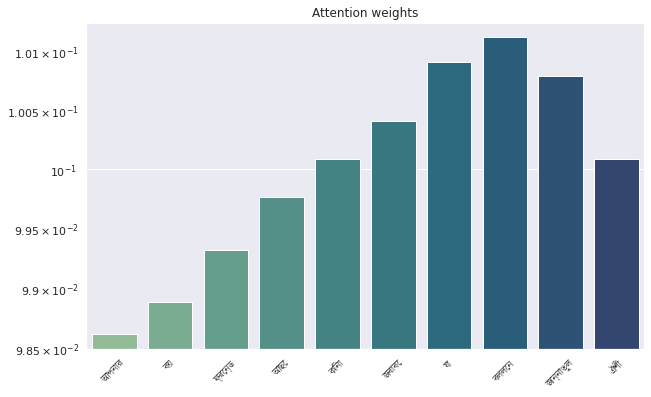

In [ ]:
import matplotlib.font_manager as fm

prop = fm.FontProperties(fname='kalpurush.ttf')
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.barplot(words,attention_weights,palette='crest')
plt.yscale('log')
plt.xticks(ticks=list(range(10)),labels=words,fontproperties=prop,rotation=45)
plt.title('Attention weights')
plt.savefig('att_weight.png')

In [ ]:
preds = model.predict(x_test)
preds

array([[0.0001693 ],
       [0.00718768],
       [0.00029579],
       ...,
       [0.00044028],
       [0.00019879],
       [0.00209868]], dtype=float32)

In [ ]:
preds = np.rint(preds)
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
# Confusion matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5548
           1       0.62      0.35      0.44       197

    accuracy                           0.97      5745
   macro avg       0.80      0.67      0.71      5745
weighted avg       0.96      0.97      0.97      5745



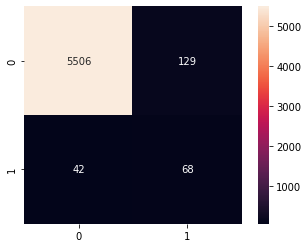

In [ ]:
con_mat = confusion_matrix(preds, y_test)
sns.heatmap(con_mat, square=True, annot=True, fmt='d') 

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # values shape == (batch_size, max_len, hidden size)

    # we are doing this to broadcast addition along the time axis to calculate the score
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector
  def get_config(self):
        return super(BahdanauAttention,self).get_config()

In [ ]:
from keras.layers import Embedding,LSTM

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
sequence_input=Input((MAX_SEQUENCE_LENGTH,))
embedded_sequences = embedding_layer(sequence_input)
lstm1=Bidirectional(LSTM(256,return_sequences=True))(embedded_sequences)
dp=Dropout(0.5)(lstm1)
lstm2_output=Bidirectional(LSTM(256,return_sequences=True,return_state=True))(dp)
query_state = concatenate([lstm2_output[2],lstm2_output[4]])
att_out=BahdanauAttention(units=512)(lstm2_output[1],query_state)
outputs=Dense(1,activation='sigmoid',trainable=True)(att_out)
model=Model(sequence_input,outputs)

In [ ]:
lstm2_output[0].shape

TensorShape([None, 17, 512])

In [ ]:
lstm2_output[1].shape

TensorShape([None, 256])

In [ ]:
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 17)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 17, 100)      2460700     input_8[0][0]                    
__________________________________________________________________________________________________
bidirectional_13 (Bidirectional (None, 17, 512)      731136      embedding_1[2][0]                
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 17, 512)      0           bidirectional_13[0][0]           
___________________________________________________________________________________________

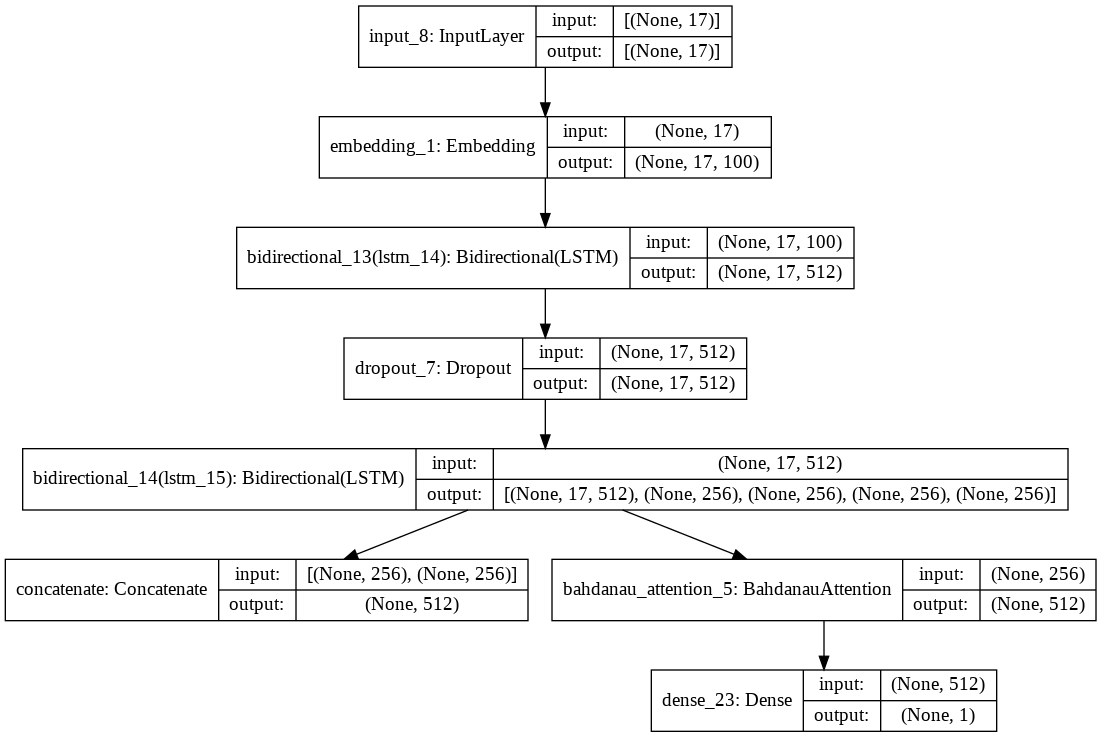

In [ ]:
#plotting model
plot_model(model, show_shapes=True, to_file = 'lstm_w2vec_notrain_BahdanauAttention.png')

In [ ]:
history,model=model_compilation_fit(model)

In [ ]:
lstm2 = model.get_layer(index=4)

In [ ]:
lstm2.output_shape

[(None, 17, 512), (None, 256), (None, 256), (None, 256), (None, 256)]

In [ ]:
import keras.backend as K
keras_function = K.function([model.input], [lstm2.output])
outputs=keras_function(np.random.randn(1,17))

In [ ]:
val = outputs[0][0][0][0][-1]
len(val)

512

In [ ]:
preds = model.predict(x_test)
preds

array([[0.0001693 ],
       [0.00718768],
       [0.00029579],
       ...,
       [0.00044028],
       [0.00019879],
       [0.00209868]], dtype=float32)

In [ ]:
preds = np.rint(preds)
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
# Confusion matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5548
           1       0.62      0.35      0.44       197

    accuracy                           0.97      5745
   macro avg       0.80      0.67      0.71      5745
weighted avg       0.96      0.97      0.97      5745



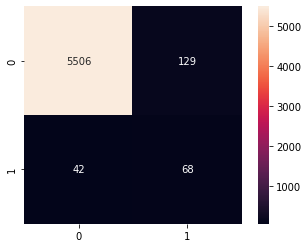

In [ ]:
con_mat = confusion_matrix(preds, y_test)
sns.heatmap(con_mat, square=True, annot=True, fmt='d') 

## Bi-GRU

In [ ]:
from keras.layers import Embedding,GRU

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
sequence_input=Input((MAX_SEQUENCE_LENGTH,))
embedded_sequences = embedding_layer(sequence_input)
gru1=Bidirectional(GRU(256,return_sequences=True))(embedded_sequences)
dp=Dropout(0.5)(gru1)
gru2=Bidirectional(GRU(256,return_sequences=True))(dp)
att_out=attention(units=512)(gru2)
outputs=Dense(1,activation='sigmoid',trainable=True)(att_out)
model=Model(sequence_input,outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 17, 100)           2460700   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 17, 512)           549888    
_________________________________________________________________
dropout_5 (Dropout)          (None, 17, 512)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 17, 512)           1182720   
_________________________________________________________________
attention_3 (attention)      (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513 

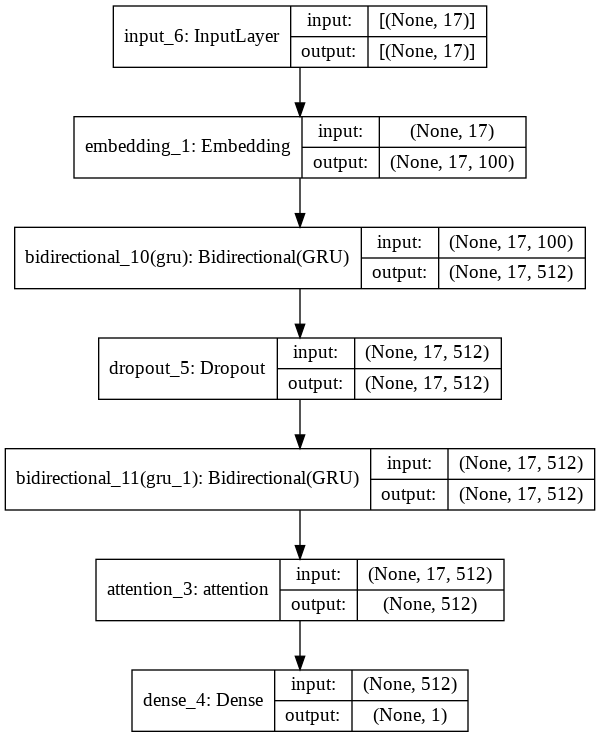

In [ ]:
#plotting model
plot_model(model, show_shapes=True, to_file = 'gru_w2vec_notrain.png')

In [ ]:
history,model=model_compilation_fit(model)

In [ ]:
preds = model.predict(x_test)
preds

array([[0.00044618],
       [0.00398478],
       [0.00022645],
       ...,
       [0.00020371],
       [0.00012139],
       [0.00564928]], dtype=float32)

In [ ]:
preds = np.rint(preds)
preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
# Confusion matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5548
           1       0.62      0.36      0.45       197

    accuracy                           0.97      5745
   macro avg       0.80      0.67      0.72      5745
weighted avg       0.97      0.97      0.97      5745



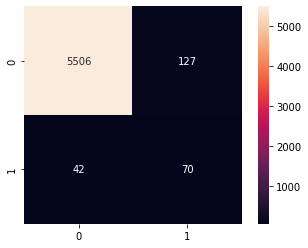

In [ ]:
con_mat = confusion_matrix(preds, y_test)
sns.heatmap(con_mat, square=True, annot=True, fmt='d') 

In [ ]:
# Data cleaning function
def process_content(content): 
    content = re.sub('[^\u0980-\u09FF]',' ',str(content)) #removing unnecessary punctuation
    return content

In [ ]:
class TokenizedCorpus:
  def __init__(self,corpus_file):
    self.corpus_file = corpus_file
    self.vectorized_data=[]
  def __iter__(self):
    for sample in self.corpus_file:
      #yield casual_tokenize(sample)
      yield basic_tokenizer.tokenize(sample)

In [ ]:
tokenized_data = TokenizedCorpus(banfake_authentic1.title[:len(banfake_authentic1.title)//2])

In [ ]:
num_features = 150
min_word_count = 2
num_workers = -1
window_size = 6
subsampling = 1e-3

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(
tokenized_data,
workers=num_workers,
vector_size =num_features,
min_count=min_word_count,
window=window_size,
sample=subsampling)

In [ ]:
word2vec1 = model.wv
del model

In [ ]:
word2vec1.index_to_key[:5]

[':', ',', '’', '-', '‘']

In [ ]:
word2vec1[':']

array([-3.5748482e-04,  1.5762012e-04,  3.4022331e-03,  6.0061822e-03,
       -6.2019667e-03, -4.7445390e-03,  4.3059140e-03,  5.9819920e-03,
       -3.3436187e-03, -2.5089153e-03,  4.9203364e-03, -1.0223150e-03,
       -3.0244095e-03,  4.3693669e-03, -3.2401069e-03, -1.2106784e-03,
        1.9177198e-03,  6.6124916e-04, -5.5234767e-03, -6.2992126e-03,
        4.8745107e-03,  3.3801747e-03,  4.5051291e-03,  5.0857704e-04,
        4.2339261e-03, -2.2702441e-03, -6.3093501e-04,  3.8457154e-03,
       -5.0144261e-03, -2.6240698e-03, -5.0077215e-03, -6.2002818e-04,
        6.3587460e-03, -4.8794444e-03, -1.5558465e-03, -1.2918281e-03,
        5.3849570e-03, -3.9539305e-03,  3.0107498e-05, -3.1691566e-03,
       -6.4023668e-03,  3.3381954e-03, -5.8397246e-03, -2.9278835e-03,
       -2.3399989e-05, -1.9745508e-04, -5.1074936e-03,  6.4098281e-03,
        3.3213710e-03,  6.1554289e-03, -5.4386123e-03,  2.9971981e-03,
       -2.7580515e-03,  5.4968992e-04,  5.6657456e-03, -2.9747852e-03,
      

In [ ]:
tokenized_data = TokenizedCorpus(banfake_authentic1.content[:len(banfake_authentic1.content)//2])

In [ ]:
num_features = 150
min_word_count = 2
num_workers = -1
window_size = 6
subsampling = 1e-3

In [ ]:
model = Word2Vec(
tokenized_data,
workers=num_workers,
vector_size =num_features,
min_count=min_word_count,
window=window_size,
sample=subsampling)

In [ ]:
word2vec2 = model.wv
del model

In [ ]:
[x for x in word2vec2.index_to_key if len(x)<2]

['।',
 ',',
 'ও',
 '-',
 'এ',
 '’',
 ')',
 '(',
 '‘',
 '.',
 '/',
 ':',
 '?',
 "'",
 '১',
 '৫',
 '২',
 '৩',
 'ড',
 '৪',
 '!',
 'র',
 '৭',
 '৬',
 '৮',
 '“',
 '”',
 ';',
 '৯',
 '—',
 '০',
 '–',
 'আ',
 'ই',
 '"',
 '*',
 'ম',
 'ক',
 'স',
 '[',
 ']',
 '॥',
 '>',
 'শ',
 'খ',
 'ল',
 'ঐ',
 '%',
 '•',
 'ব',
 '@',
 '…',
 'হ',
 '=',
 '\u200c',
 'a',
 'জ',
 '৷',
 'গ',
 '#',
 '^',
 '‡',
 '_',
 '+',
 '♦',
 '<',
 '►',
 '\\',
 'অ',
 'ঘ',
 '●',
 'i',
 '`',
 'ন',
 'য়',
 's',
 '†',
 'ছ',
 'b',
 'ট',
 '&',
 'দ',
 '|',
 'চ',
 'I',
 'e',
 'ঙ',
 'c',
 'd',
 '1',
 'প',
 'f',
 'j',
 'A',
 'g',
 '❏',
 'উ',
 'ফ',
 'h',
 'q',
 '■',
 '~',
 '2',
 '‚',
 'K',
 'ষ',
 'm',
 '·',
 'থ',
 'ঝ',
 '⇒',
 'ভ',
 'k',
 '¾',
 '{',
 't',
 '3',
 '}',
 'M',
 '¡',
 'ত',
 'ে',
 '4',
 '5',
 'Z',
 '\ufeff',
 '0',
 '§',
 '\u200d',
 'া',
 '9',
 'ঞ',
 '8',
 'Q',
 'v',
 '×',
 'T',
 'ণ',
 'ঋ',
 'P',
 'B',
 'য',
 'L',
 '6',
 '„',
 'n',
 '›',
 'ৎ',
 'C',
 'D',
 '̈',
 'E',
 'R',
 'ধ',
 'ঠ',
 'G',
 'V',
 '¿',
 'w',
 '7',
 '∴',
 '✔',
 'Ñ',
 'F']

In [ ]:
len(word2vec2.index_to_key)

96198

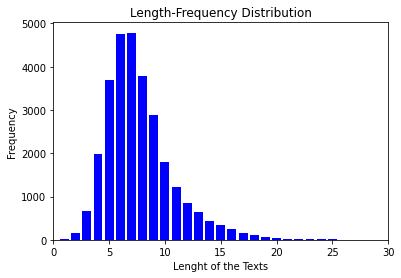

Maximum Length of a title: 48
Minimum Length of a title: 1
Average Length of a title: 8.0


In [ ]:
# Calculate the Review of each of the Review
import collections
frequency = collections.Counter(all_combined['title'].apply(lambda x: len(basic_tokenizer.tokenize(str(x)))))

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(0, 30)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a title: {np.max(all_combined['title'].apply(lambda x: len(basic_tokenizer.tokenize(str(x)))))}")
print(f"Minimum Length of a title: {min(all_combined['title'].apply(lambda x: len(basic_tokenizer.tokenize(str(x)))))}")
print(f"Average Length of a title: {round(np.mean(all_combined['title'].apply(lambda x: len(basic_tokenizer.tokenize(str(x))))),0)}")

# Bi-GRU

In [ ]:
maxlen = 20
batch_size = 512
embedding_dims = 150
epochs = 20

In [ ]:
total_vocab = set([w for words in all_combined['title'].apply(lambda x:basic_tokenizer.tokenize(str(x))) for w in words ])
len(total_vocab)

25782

In [ ]:
coverage1 = len([w for w in total_vocab if w in word2vec1.index_to_key])/len(total_vocab)

In [ ]:
coverage1

0.33825925063998136

In [ ]:
all_combined[all_combined.title==0]

,title,content,label
426,0,0,0
431,0,0,0


In [ ]:
dataset=all_combined[all_combined.title != 0]
split_point = int(len(dataset)*0.8)
train = data_generator(dataset.title[:split_point].values,dataset.label[:split_point].values,
                       maxlen,embedding_dims,word2vec1,batch_size)
validation = data_generator(dataset.title[split_point:].values,dataset.label[split_point:].values,
                       maxlen,embedding_dims,word2vec1,batch_size,mode='eval')

NameError: ignored

In [ ]:
import datetime
log_dir = 'logs/'+datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1,write_grads=True)

# For Stratified Kfold purposes

In [ ]:
#@title
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2,3,4], [5,6,7,8], [9,10,11,12], [13, 14,15,16],[1, 2,3,4], [5,6,7,8], [9,10,11,12], [13, 14,15,16]])
y = np.array([0, 0, 1, 1,0, 0, 1, 1])
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)

print(skf)

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [ ]:
#@title
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [3 4 5 6 7] TEST: [0 1 2]
TRAIN: [0 1 2 5 7] TEST: [3 4 6]
TRAIN: [0 1 2 3 4 6] TEST: [5 7]


In [ ]:
#@title
# # Training with KFold 

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)
# train = data_generator(dataset.title.values,dataset.label.values,
                      #  maxlen,embedding_dims,word2vec1,batch_size)
train_x,y = dataset.title,dataset.label.values 
train_x = train_x.apply(lambda x:tokenizer.tokenize(str(x)))
sample_vecs = []
for token in tokens:
try:
  sample_vecs.append(word_vectors[token])

except KeyError:
  pass # No matching token in the Google w2v vocab
sample_vecs = sample_vecs[:maxlen] + [[0.]* embedding_dims] * (maxlen - len(sample_vecs)) 
batch_data.append(np.reshape(sample_vecs,(maxlen,embedding_dims)))

for i, (train_idx, valid_idx) in enumerate(skf.split(train_x, y)):
    train_x = train_x[train_idx]
    train_y = y[train_idx]
    valid_x = train_x[valid_idx]
    valid_y = y[valid_idx] 
    
    # history = model.fit(train_x, train_y, 
    #       batch_size=512, 
    #       epochs=20, 
    #       validation_data=(valid_x, valid_y), 
    #       callbacks=[checkpoints, reduce_lr, early_stop]) 
    # print(len(valid_y),len(valid_x),len(train_x),len(train_y))
    print(len(train_idx),len(valid_idx))

3288 1096
3288 1096
3288 1096
3288 1096


# without KFold 

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 20, 150) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_3 [(None, 20, 150)] float32
bidirectional_2 (None, 20, 150) float32
global_average_pooling1d_2 (None, 20, 128) float32
dense_4 (None, 128) float32
dropout_2 (None, 16) float32
dense_5 (None, 16) float32


[None, None, None, None, None, None]

In [ ]:
history = model.fit(train,steps_per_epoch=split_point//batch_size,
                    validation_data=validation,
                    validation_steps =(len(dataset)-split_point)//batch_size ,
                    epochs=epochs,use_multiprocessing=True,
                    workers=8,verbose = 1,
          callbacks=[checkpoints, reduce_lr, early_stop,tensorboard_callback]) 

Epoch 1/20
44/44 [==============================] - 80s 156ms/step - loss: 0.6160 - accuracy: 0.7769 - val_loss: 0.4217 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from -inf to 0.42173, saving model to cm_bigru1_title_Em_weight.hdf5
Epoch 2/20
44/44 [==============================] - 6s 134ms/step - loss: 0.4425 - accuracy: 0.8642 - val_loss: 0.0911 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.42173
Epoch 3/20
44/44 [==============================] - 6s 135ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 2.6328e-07 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.42173
Epoch 4/20
44/44 [==============================] - 6s 134ms/step - loss: 7.1887e-06 - accuracy: 1.0000 - val_loss: 1.8498e-07 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.42173
Epoch 5/20
44/44 [==============================] - 6s 134ms/step - loss: 9.0453e-06 - accuracy: 1.0000 - val_loss: 1.7361e-07 - val_accuracy: 1.0000

Epoch 00005

In [ ]:
model.evaluate(validation,steps=(len(dataset)-split_point)//batch_size)

5/5 [==============================] - 1s 165ms/step - loss: 9.1432e-07 - accuracy: 1.0000


[9.143177521764301e-07, 1.0]

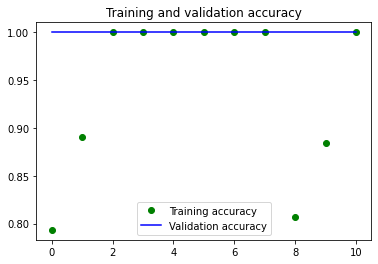

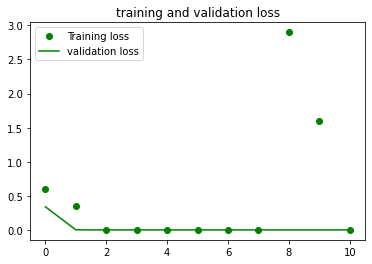

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# Calculate the Review of each of the Review
import collections
temp = all_combined['content'].apply(lambda x: len(basic_tokenizer.tokenize(str(x))))

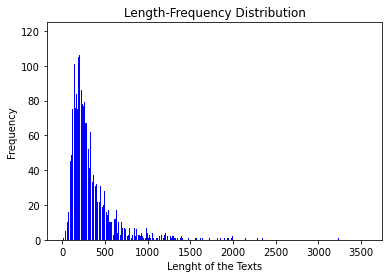

Maximum Length of a title: 3567
Minimum Length of a title: 1
Average Length of a title: 326.0


In [ ]:
frequency = collections.Counter(temp)
plt.bar(frequency.keys(), frequency.values(), color ="b")
# plt.xlim(0, 1000)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a title: {np.max(temp)}")
print(f"Minimum Length of a title: {min(temp)}")
print(f"Average Length of a title: {round(np.mean(temp),0)}")

In [ ]:
total_vocab = set([w for words in all_combined['content'].apply(lambda x:basic_tokenizer.tokenize(str(x))) for w in words ])
len(total_vocab)

198323

In [ ]:
coverage2= len([w for w in total_vocab if w in word2vec2.index_to_key])/len(total_vocab)

In [ ]:
coverage2

0.35805226826943926